(746, 12)

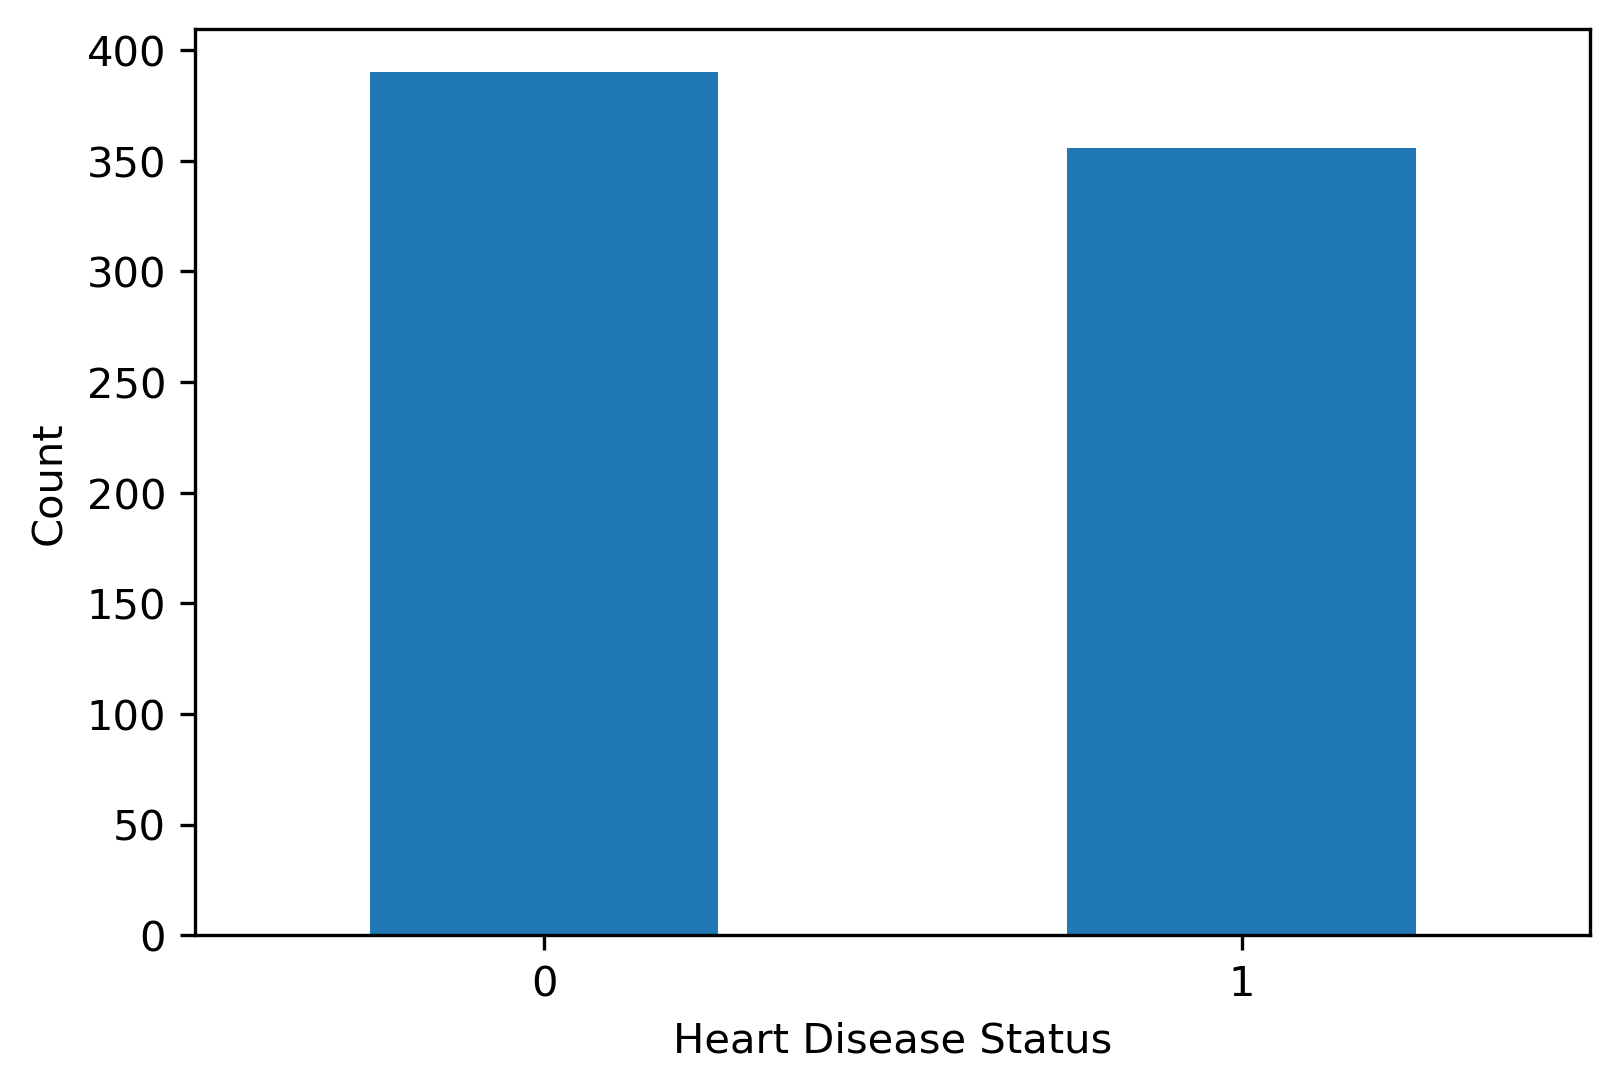

In [170]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt 

df1 = pd.read_csv("/Users/emretoner/Desktop/MidtermProject1030/heart.csv")

# after EDA of cholesterol, we see few counts of 0 which we exclude
df = df[df.Cholesterol != 0]   
X = df.iloc[:, :-1]
y = df['HeartDisease']

y.value_counts().plot(kind='bar')
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
# plt.savefig('/Users/emretoner/Desktop/MidtermProject1030/figures/count.pdf')


df.shape




Text(0.5, 1.0, 'Histogram of Cholesterol Feature')

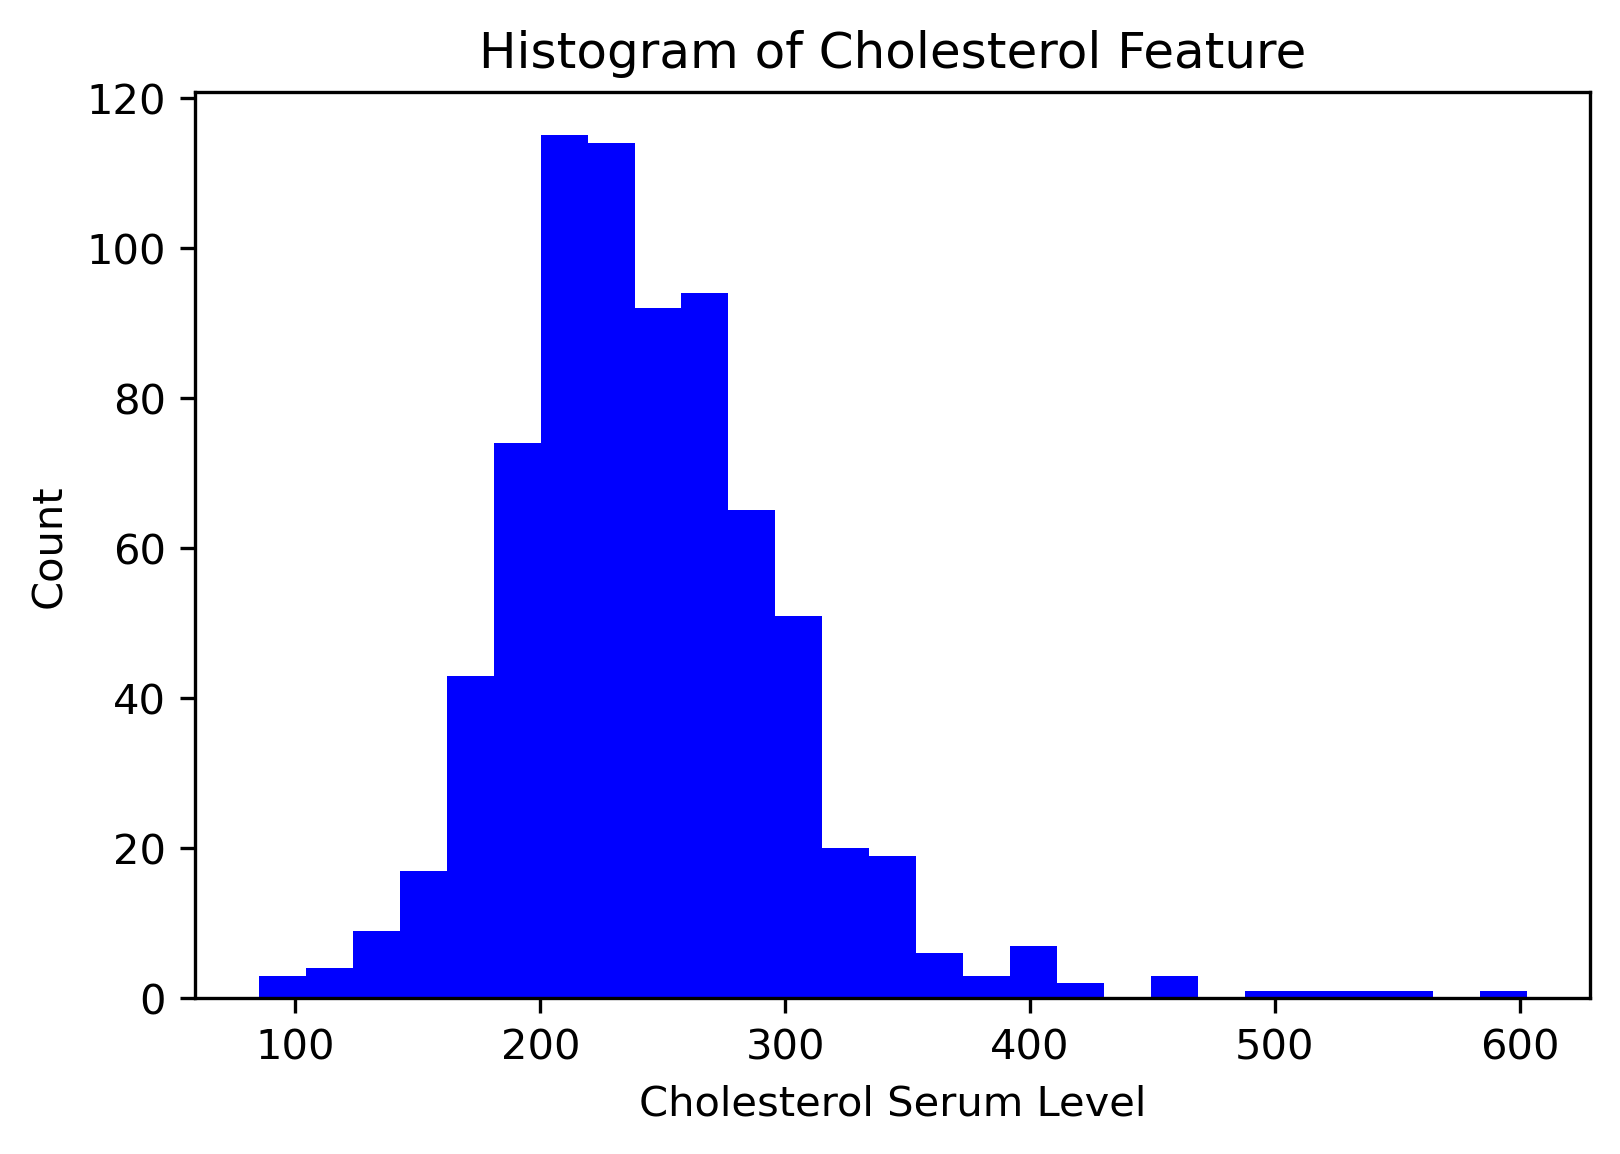

In [171]:
# histogram of the cholesterol to better understand the value distribution
plt.hist(df["Cholesterol"], color = 'blue', bins=int(np.sqrt(df.shape[0])))
plt.xlabel("Cholesterol Serum Level")
plt.ylabel("Count")
plt.title("Histogram of Cholesterol Feature")
# plt.savefig('/Users/emretoner/Desktop/MidtermProject1030/figures/cholesterol.pdf')


Text(0.5, 1.0, 'Histogram of Resting Blood Pressure Feature')

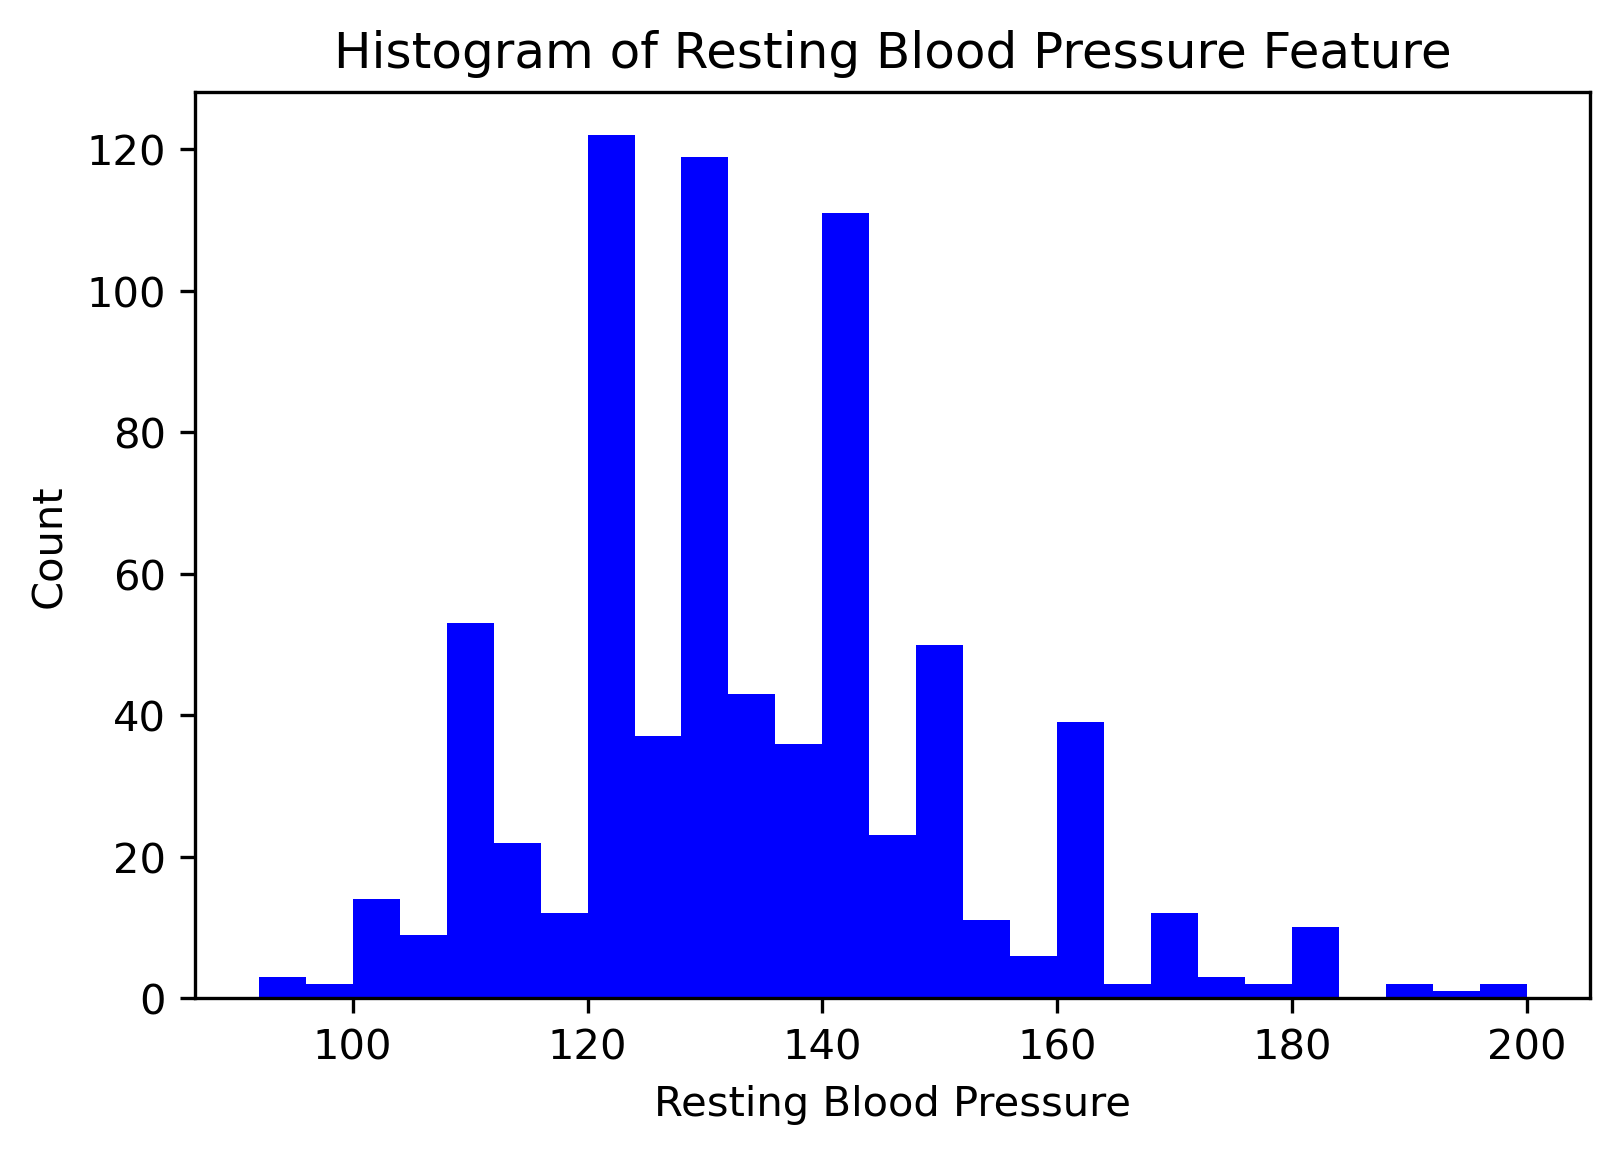

In [172]:
# histogram of the resting blood pressure to better undestand the value distribution 
plt.hist(df["RestingBP"], color = 'blue', bins=int(np.sqrt(df.shape[0])))
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Count")
plt.title("Histogram of Resting Blood Pressure Feature")
# plt.savefig('/Users/emretoner/Desktop/MidtermProject1030/figures/restingbloodp.pdf')

In [173]:
df.isnull().sum() #indicates that there are no missing values 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [174]:
df.Cholesterol.value_counts()

254    11
223    10
220    10
230     9
204     9
       ..
278     1
262     1
251     1
183     1
603     1
Name: Cholesterol, Length: 221, dtype: int64

In [175]:
print(df.describe())  # after eliminating indices with values of 0 for cholesterol, the outlier for RestingBP is also removed
print(df.columns)
print(df.shape)

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  746.000000  746.000000   746.000000  746.000000  746.000000   
mean    52.882038  133.022788   244.635389    0.167560  140.226542   
std      9.505888   17.282750    59.153524    0.373726   24.524107   
min     28.000000   92.000000    85.000000    0.000000   69.000000   
25%     46.000000  120.000000   207.250000    0.000000  122.000000   
50%     54.000000  130.000000   237.000000    0.000000  140.000000   
75%     59.000000  140.000000   275.000000    0.000000  160.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  746.000000    746.000000  
mean     0.901609      0.477212  
std      1.072861      0.499816  
min     -0.100000      0.000000  
25%      0.000000      0.000000  
50%      0.500000      0.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol

Text(0.5, 0.98, '')

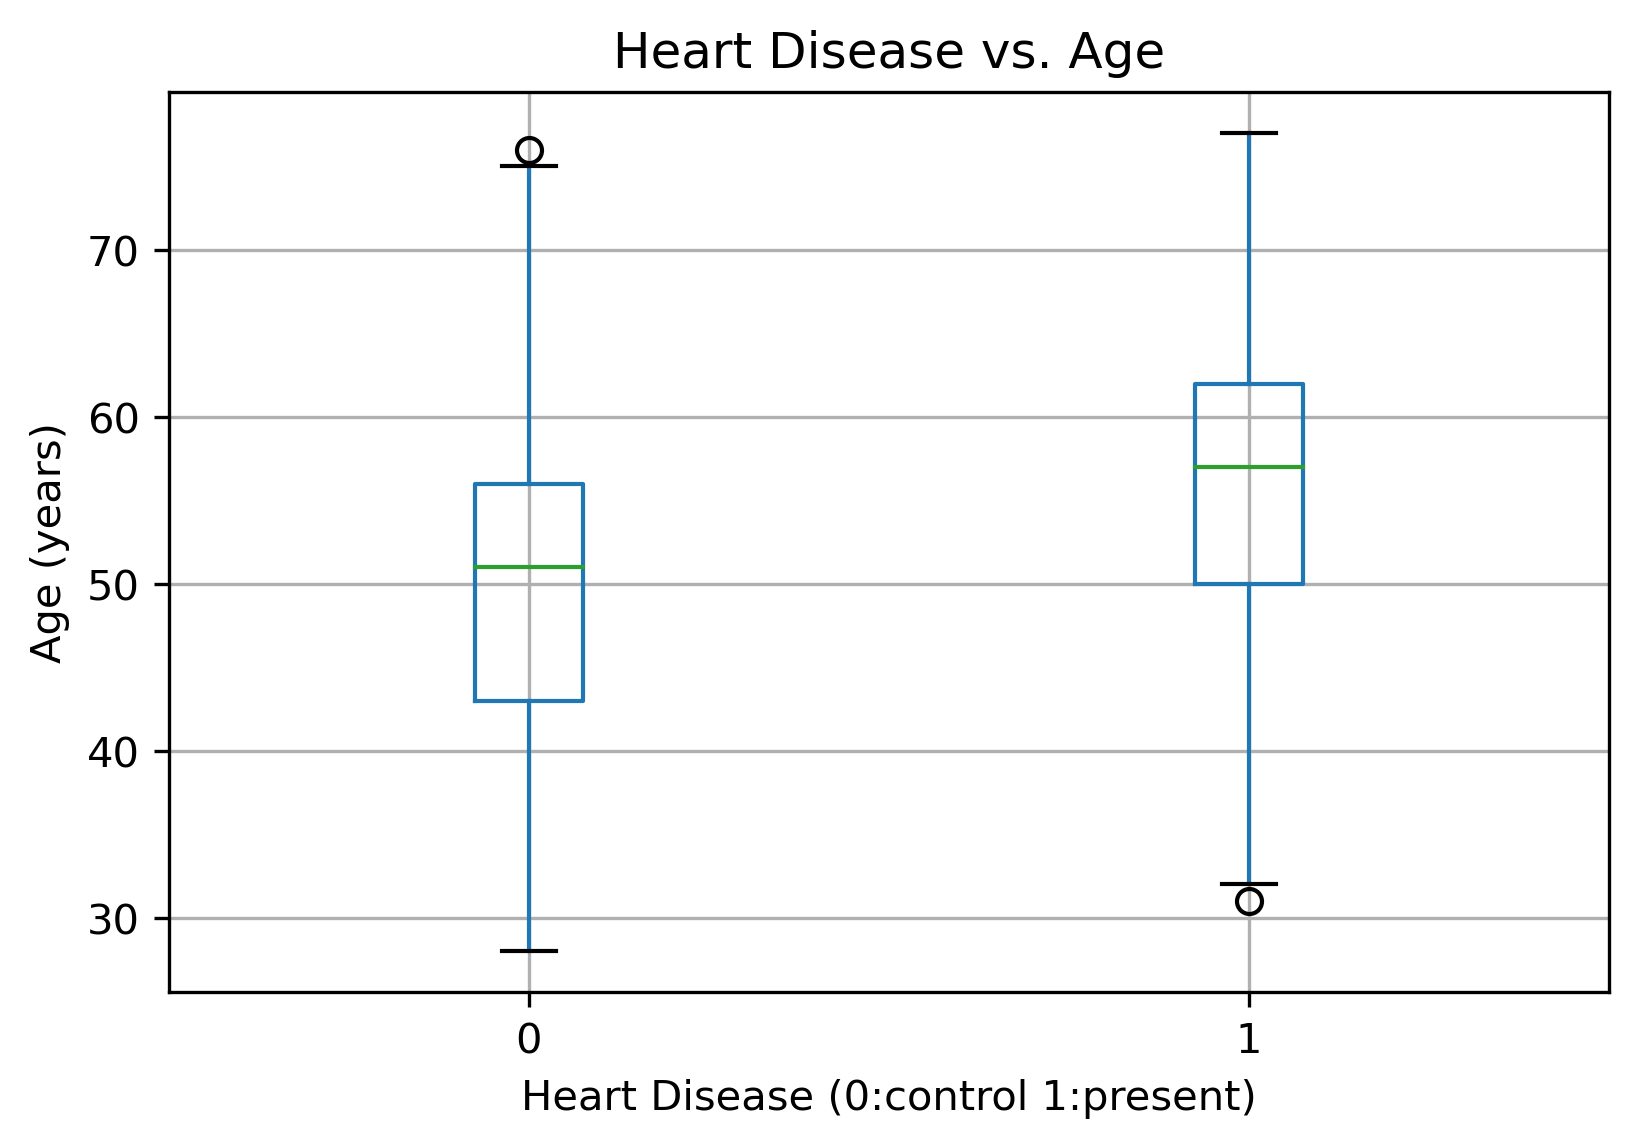

In [176]:
df[['HeartDisease', 'Age']].boxplot(by='HeartDisease')
plt.xlabel('Heart Disease (0:control 1:present)')
plt.ylabel('Age (years)')
plt.title("Heart Disease vs. Age")
plt.suptitle('')



Text(0.5, 1.0, 'Heart Disease and Sex')

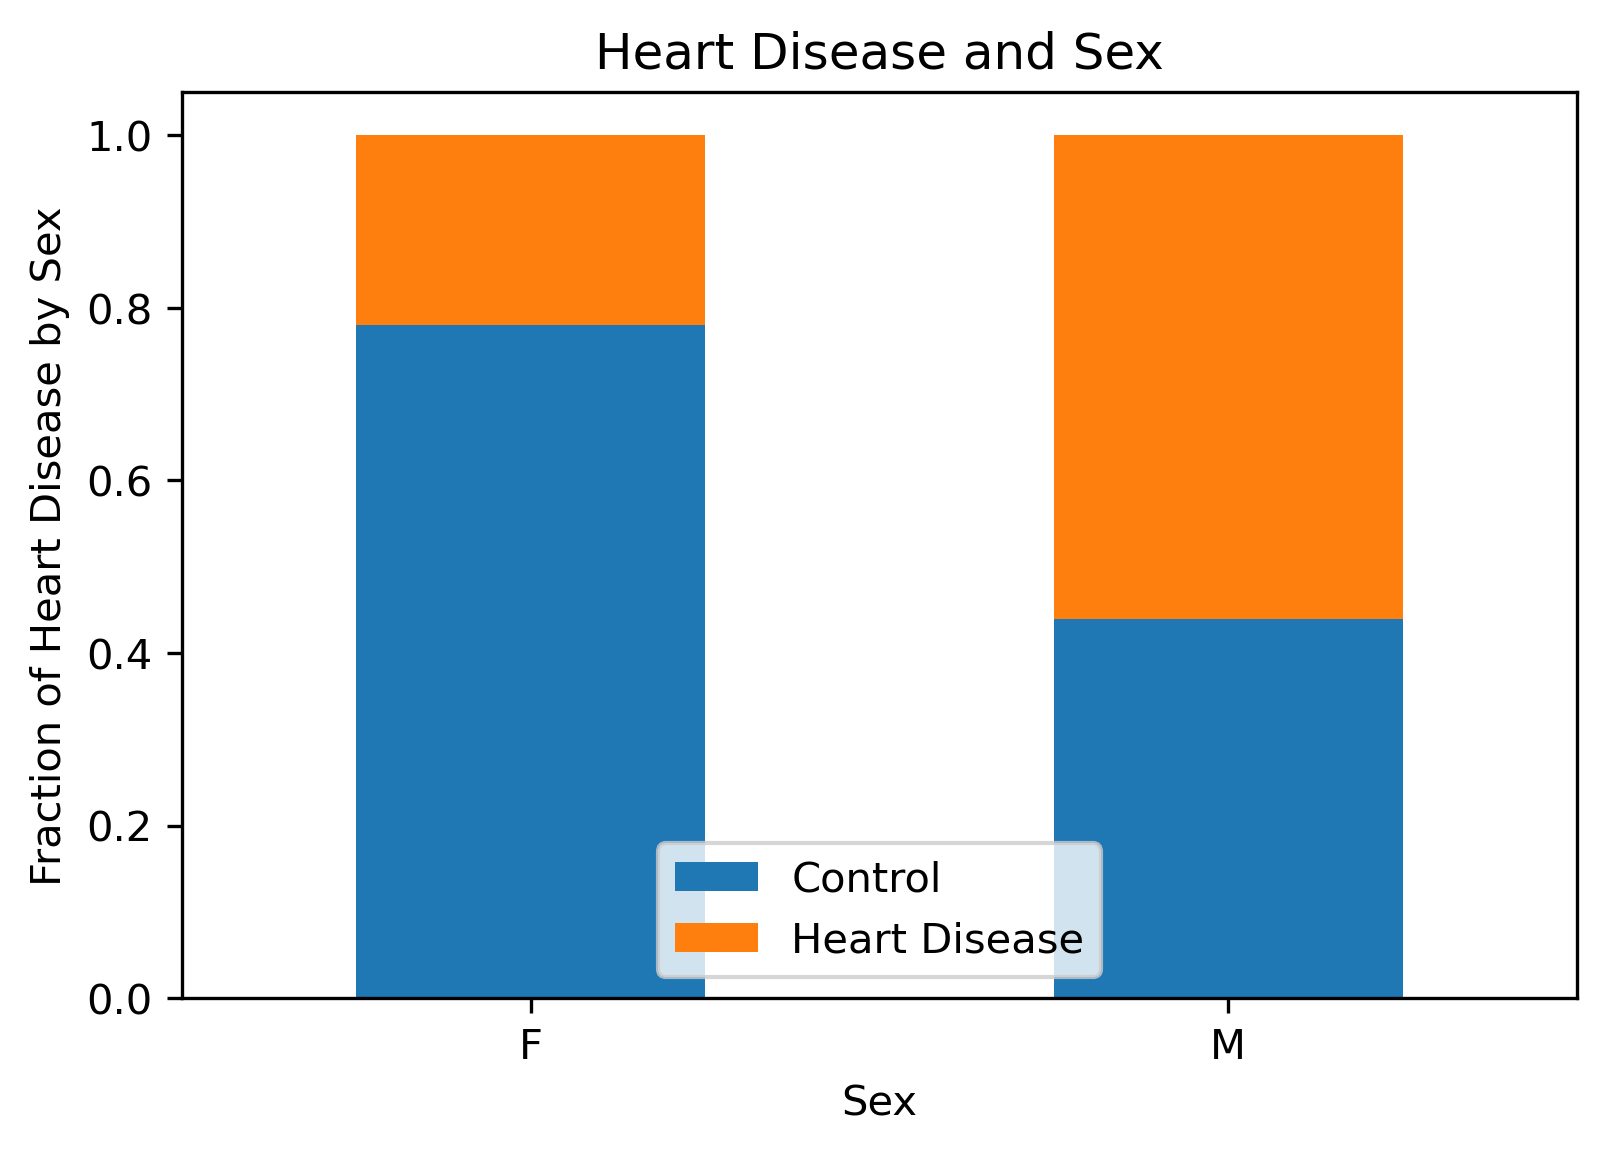

In [177]:
count_matrix = df.groupby(['Sex', 'HeartDisease']).size().unstack()
# print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)
# print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked = True)
plt.ylabel('Fraction of Heart Disease by Sex')
plt.xticks(rotation=0)


plt.legend(['Control', 'Heart Disease'], loc = 'lower center')

plt.title("Heart Disease and Sex")


In [178]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

HeartDisease     0    1
ChestPainType          
ASY             96  274
ATA            145   21
NAP            123   46
TA              26   15
HeartDisease          0         1
ChestPainType                    
ASY            0.259459  0.740541
ATA            0.873494  0.126506
NAP            0.727811  0.272189
TA             0.634146  0.365854


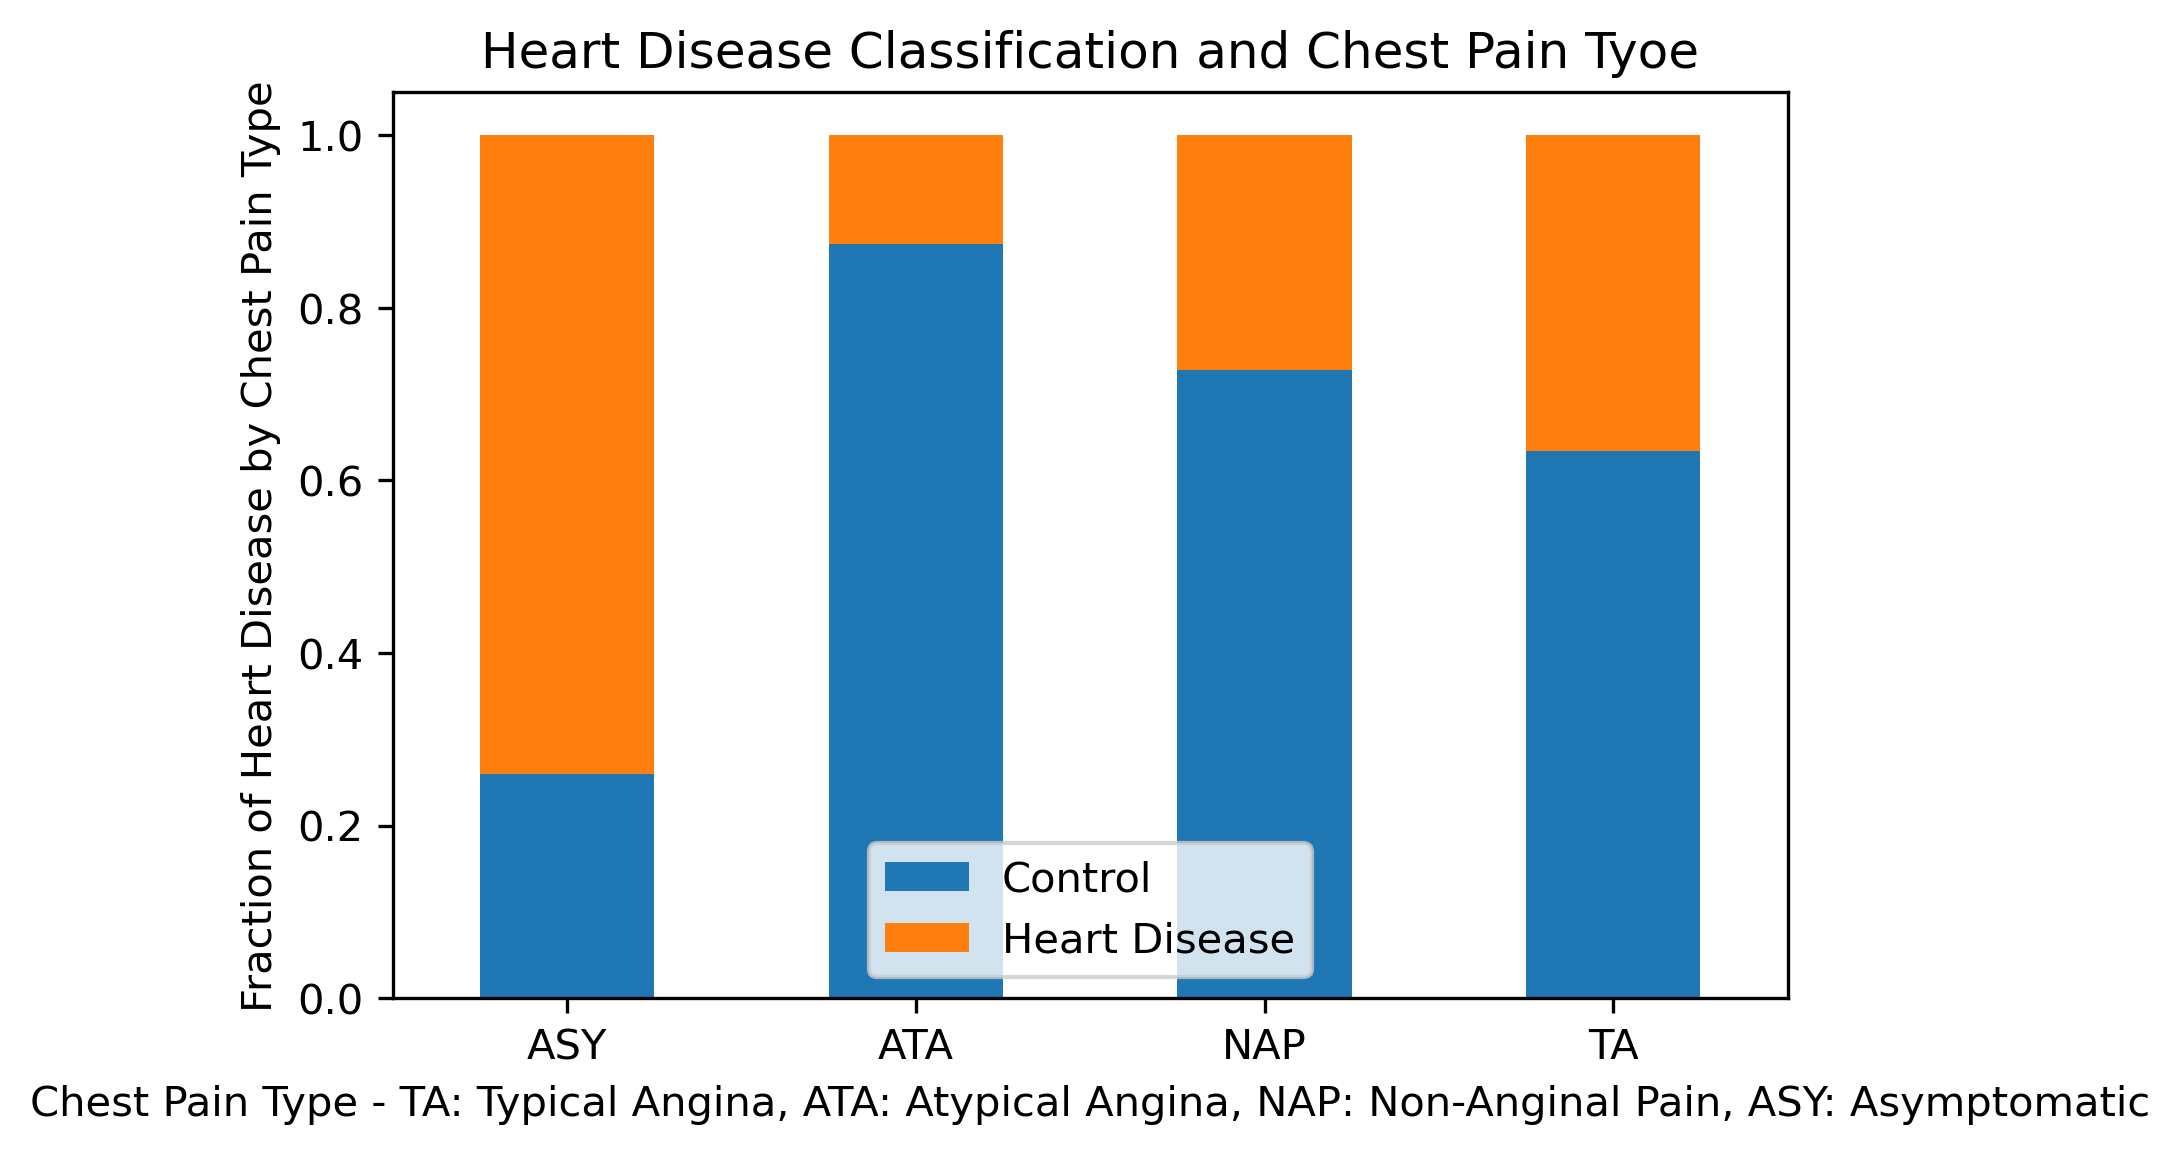

In [179]:
count_matrix2 = df.groupby(['ChestPainType', 'HeartDisease']).size().unstack()
print(count_matrix2)
count_matrix_norm2 = count_matrix2.div(count_matrix2.sum(axis=1), axis=0)
print(count_matrix_norm2)
count_matrix_norm2.plot(kind='bar', stacked = True)
plt.xlabel('Chest Pain Type - TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic')
plt.xticks(rotation=0)
plt.ylabel('Fraction of Heart Disease by Chest Pain Type')
plt.title('Heart Disease Classification and Chest Pain Tyoe')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.legend(['Control', 'Heart Disease'], loc = 'lower center')


(array([1, 2]), [Text(1, 0, '0'), Text(2, 0, '1')])

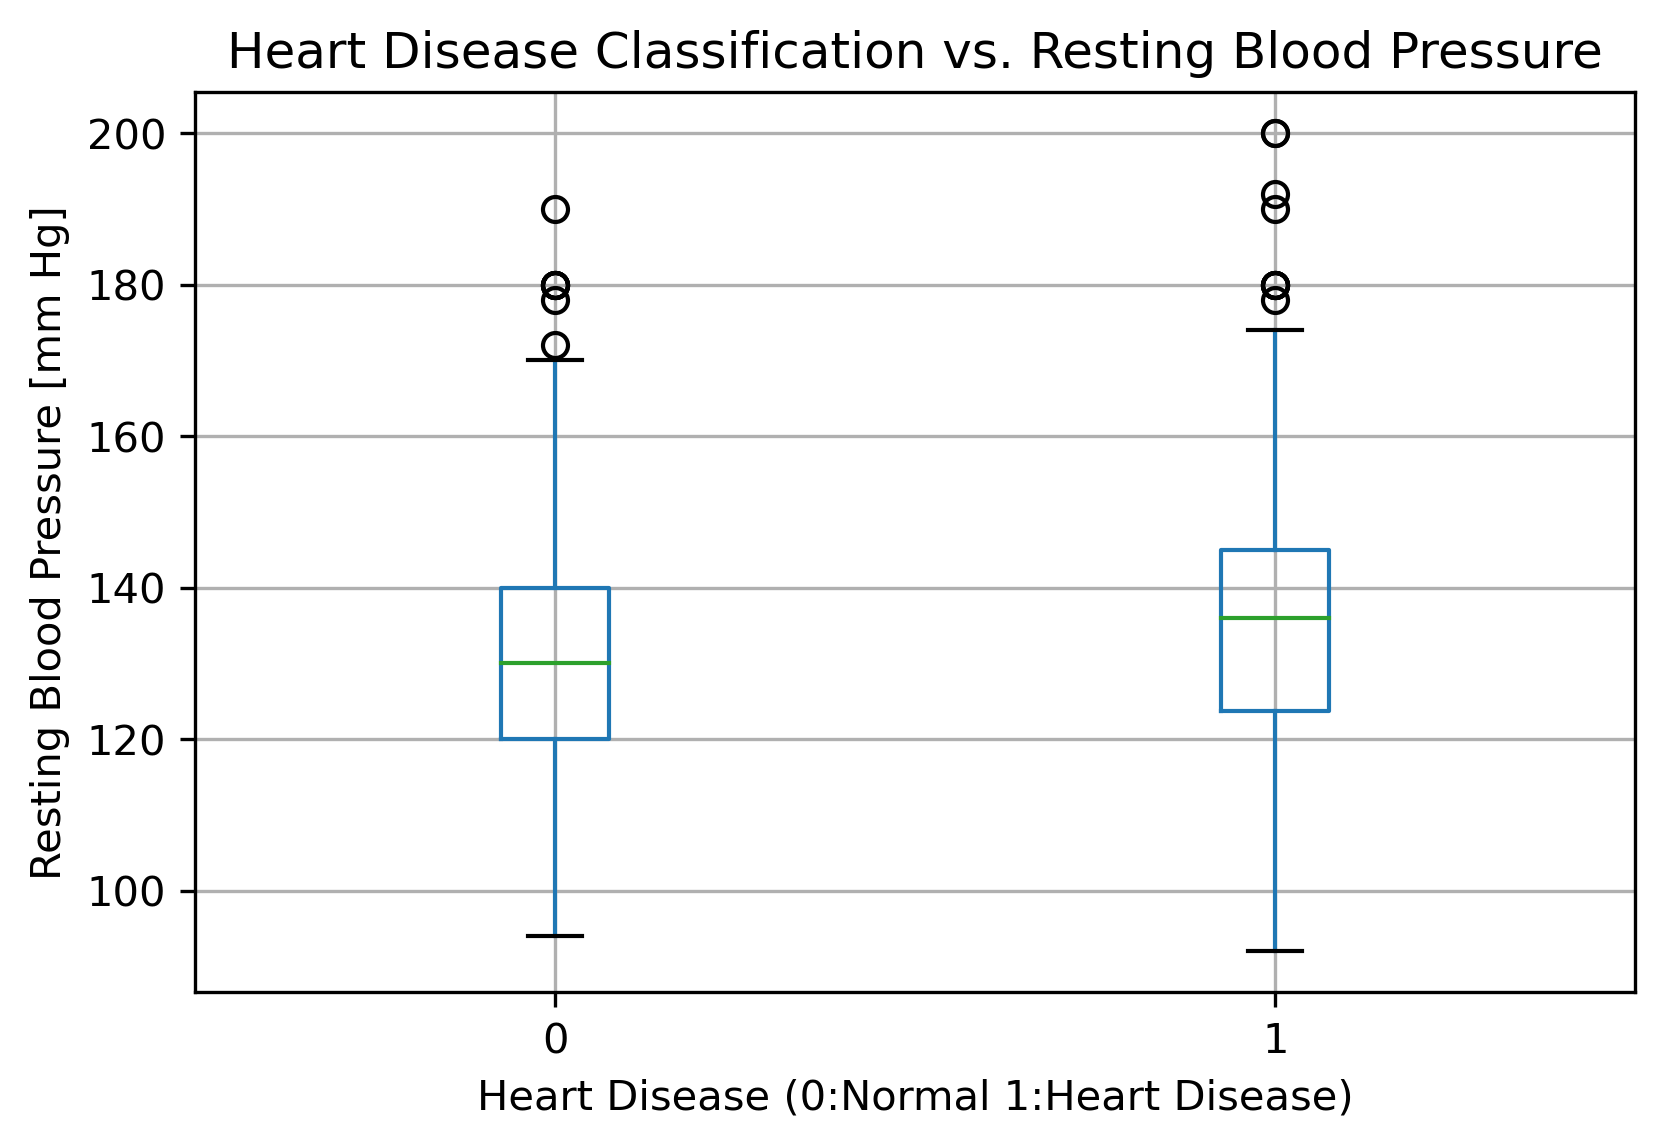

In [180]:
df[['HeartDisease', 'RestingBP']].boxplot(by='HeartDisease')
plt.xlabel('Heart Disease (0:Normal 1:Heart Disease)')
plt.ylabel('Resting Blood Pressure [mm Hg]')
plt.title("Heart Disease Classification vs. Resting Blood Pressure")
plt.suptitle('')
plt.xticks(rotation=0)


(array([1, 2]), [Text(1, 0, '0'), Text(2, 0, '1')])

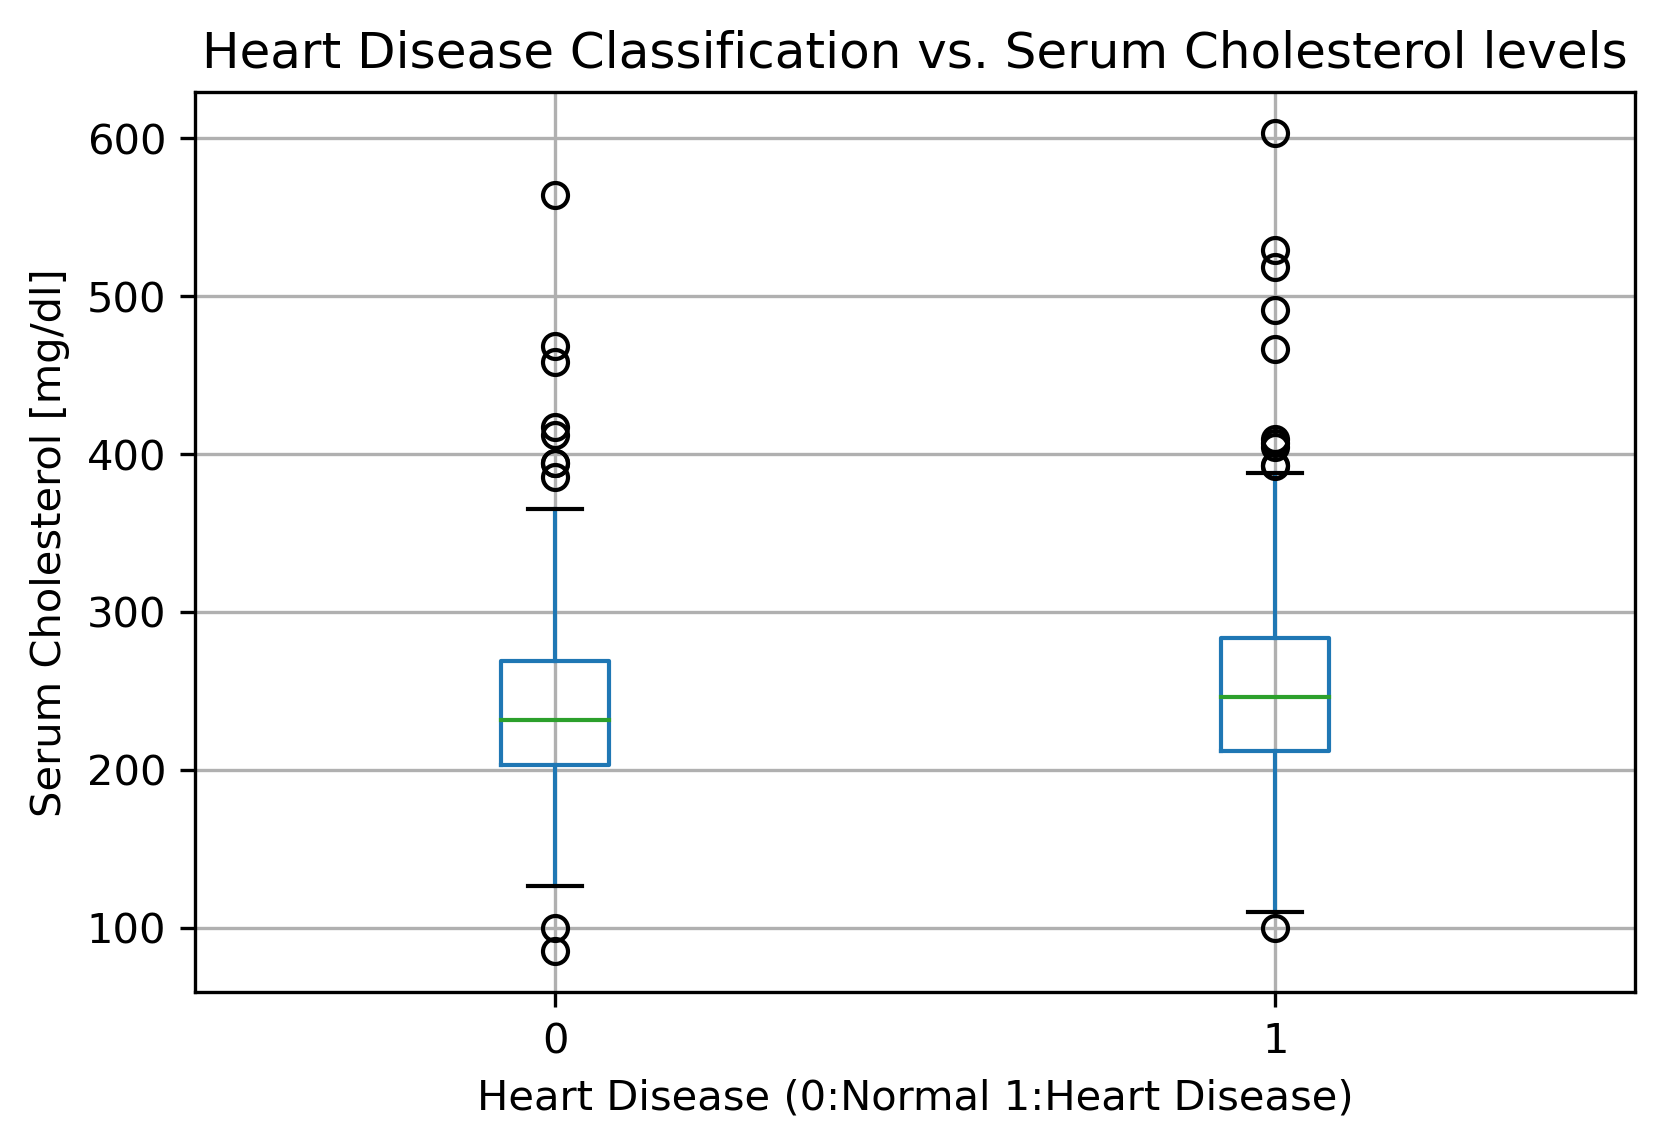

In [181]:
df[['HeartDisease', 'Cholesterol']].boxplot(by='HeartDisease')
plt.xlabel('Heart Disease (0:Normal 1:Heart Disease)')
plt.ylabel('Serum Cholesterol [mg/dl]')
plt.title("Heart Disease Classification vs. Serum Cholesterol levels")
plt.suptitle('')
plt.xticks(rotation=0)


HeartDisease    0    1
FastingBS             
0             347  274
1              43   82
HeartDisease         0         1
FastingBS                       
0             0.558776  0.441224
1             0.344000  0.656000


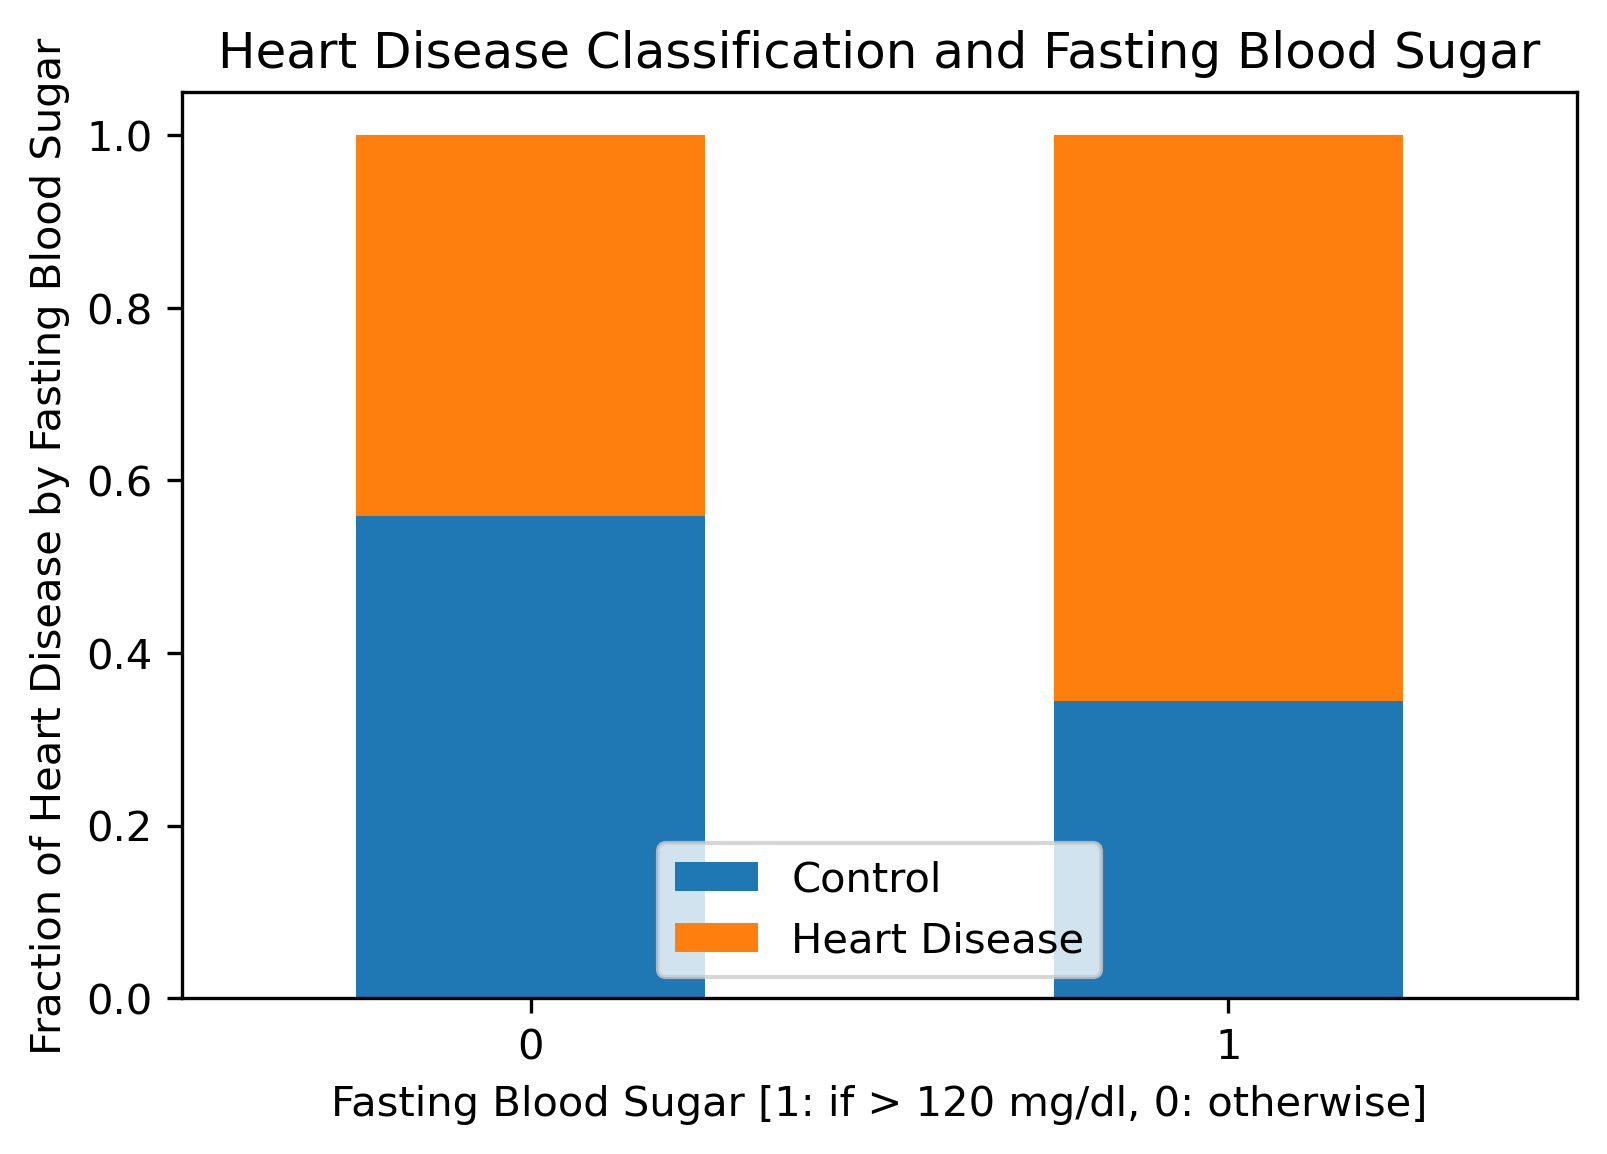

In [182]:
count_matrix3 = df.groupby(['FastingBS', 'HeartDisease']).size().unstack()
print(count_matrix3)
count_matrix_norm3 = count_matrix3.div(count_matrix3.sum(axis=1), axis=0)
print(count_matrix_norm3)
count_matrix_norm3.plot(kind='bar', stacked = True)
plt.xlabel('Fasting Blood Sugar [1: if > 120 mg/dl, 0: otherwise]')
plt.xticks(rotation=0)
plt.ylabel('Fraction of Heart Disease by Fasting Blood Sugar')
plt.title('Heart Disease Classification and Fasting Blood Sugar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.legend(['Control', 'Heart Disease'], loc = 'lower center')


HeartDisease    0    1
RestingECG            
LVH            81   95
Normal        257  188
ST             52   73
HeartDisease         0         1
RestingECG                      
LVH           0.460227  0.539773
Normal        0.577528  0.422472
ST            0.416000  0.584000


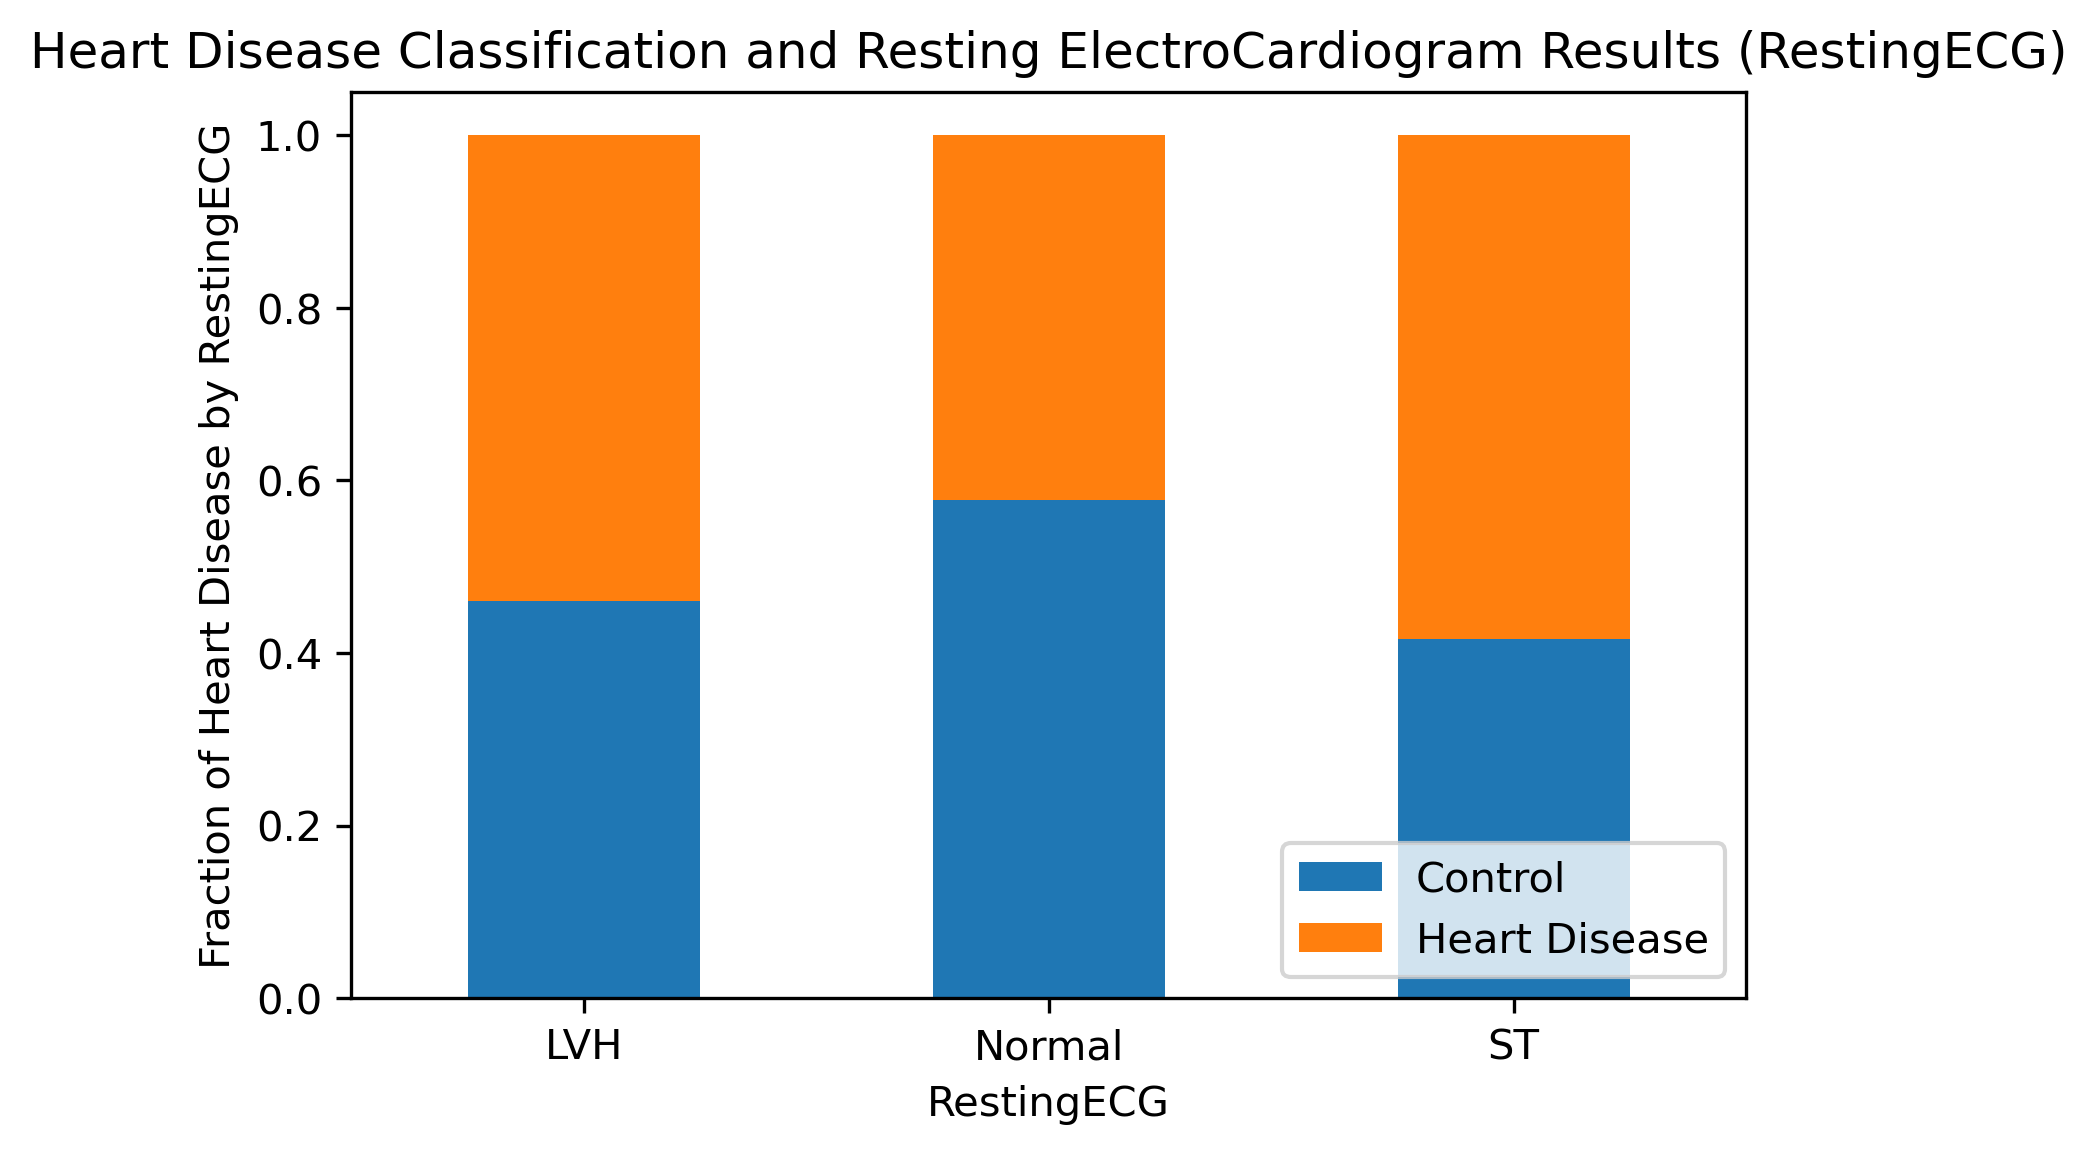

In [183]:
count_matrix4 = df.groupby(['RestingECG', 'HeartDisease']).size().unstack()
print(count_matrix4)
count_matrix_norm4 = count_matrix4.div(count_matrix4.sum(axis=1), axis=0)
print(count_matrix_norm4)
count_matrix_norm4.plot(kind='bar', stacked = True)
plt.xlabel('RestingECG')
plt.xticks(rotation=0)
plt.ylabel('Fraction of Heart Disease by RestingECG')
plt.title('Heart Disease Classification and Resting ElectroCardiogram Results (RestingECG)')
plt.legend(['Control', 'Heart Disease'], loc = 'lower right')


Text(0.5, 1.0, 'Heart Disease Classification and Max Heart Rate')

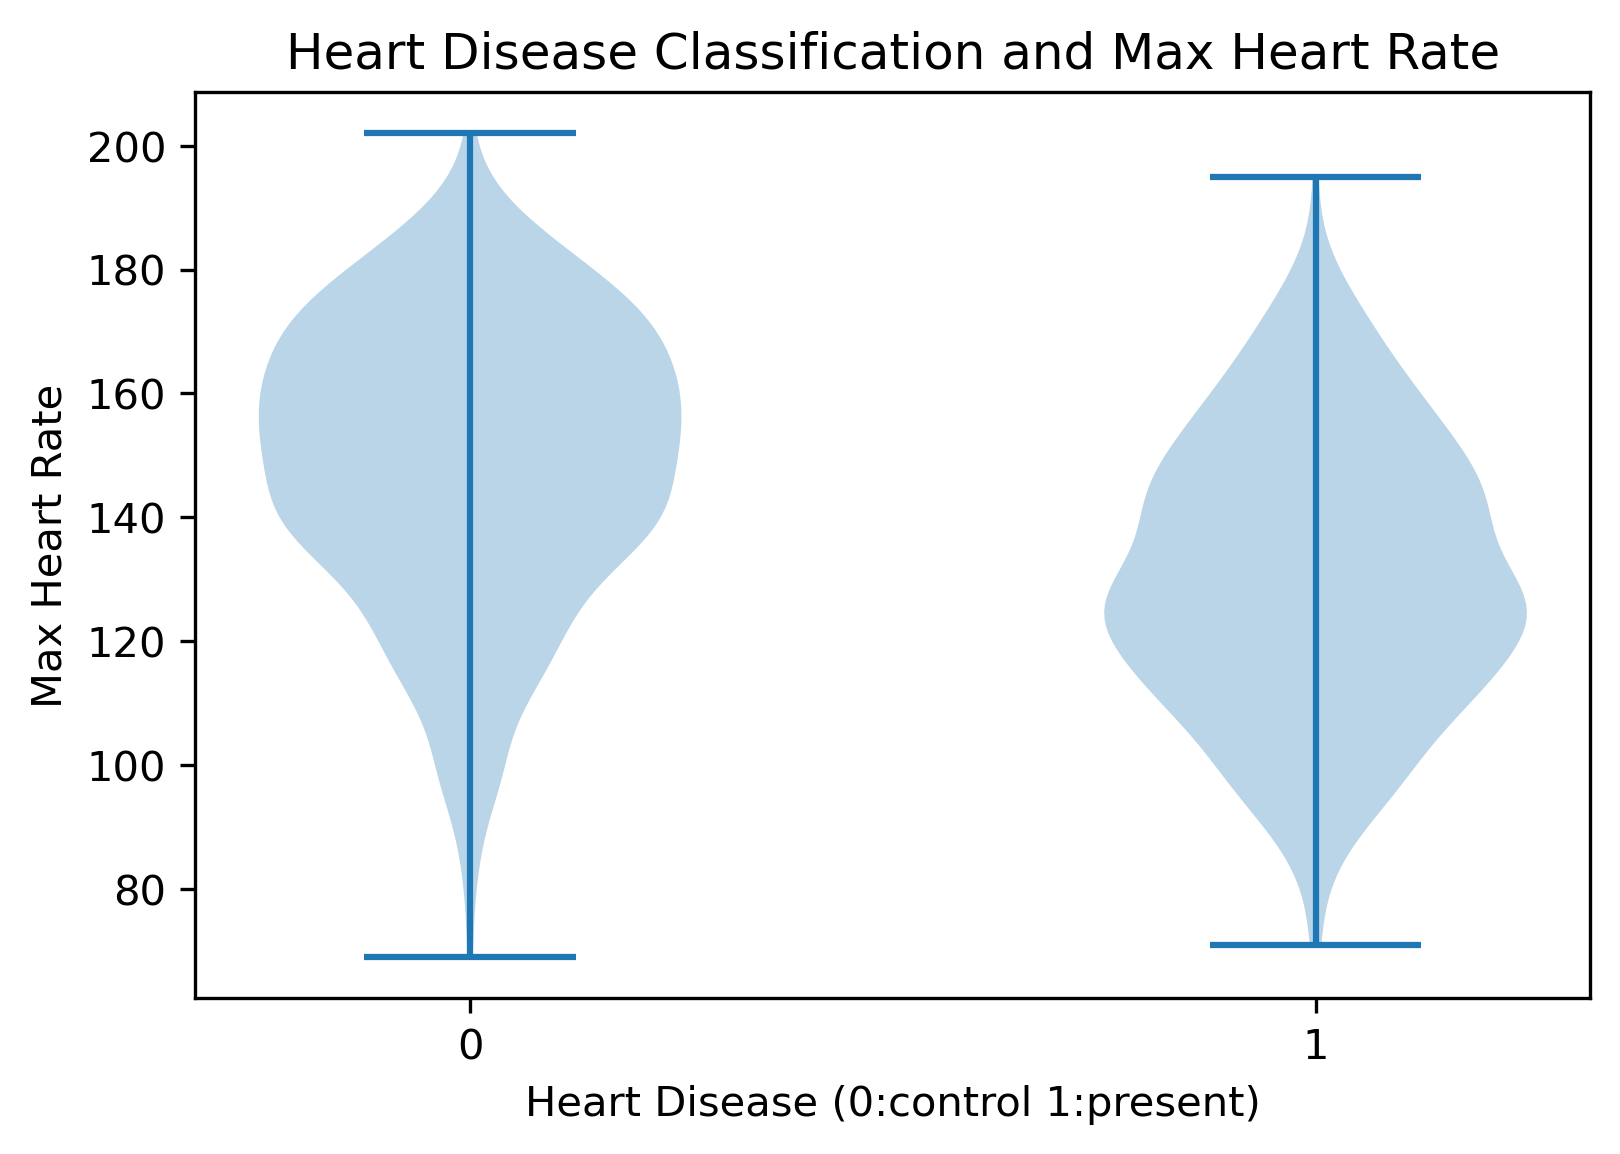

In [184]:
dataset = [df[df['HeartDisease'] == 0]['MaxHR'].values, 
          df[df['HeartDisease'] == 1]['MaxHR'].values]
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['0','1'])
plt.xlabel('Heart Disease (0:control 1:present)')
plt.ylabel('Max Heart Rate')
plt.title('Heart Disease Classification and Max Heart Rate')


HeartDisease      0    1
ExerciseAngina          
N               340  119
Y                50  237
HeartDisease           0         1
ExerciseAngina                    
N               0.740741  0.259259
Y               0.174216  0.825784


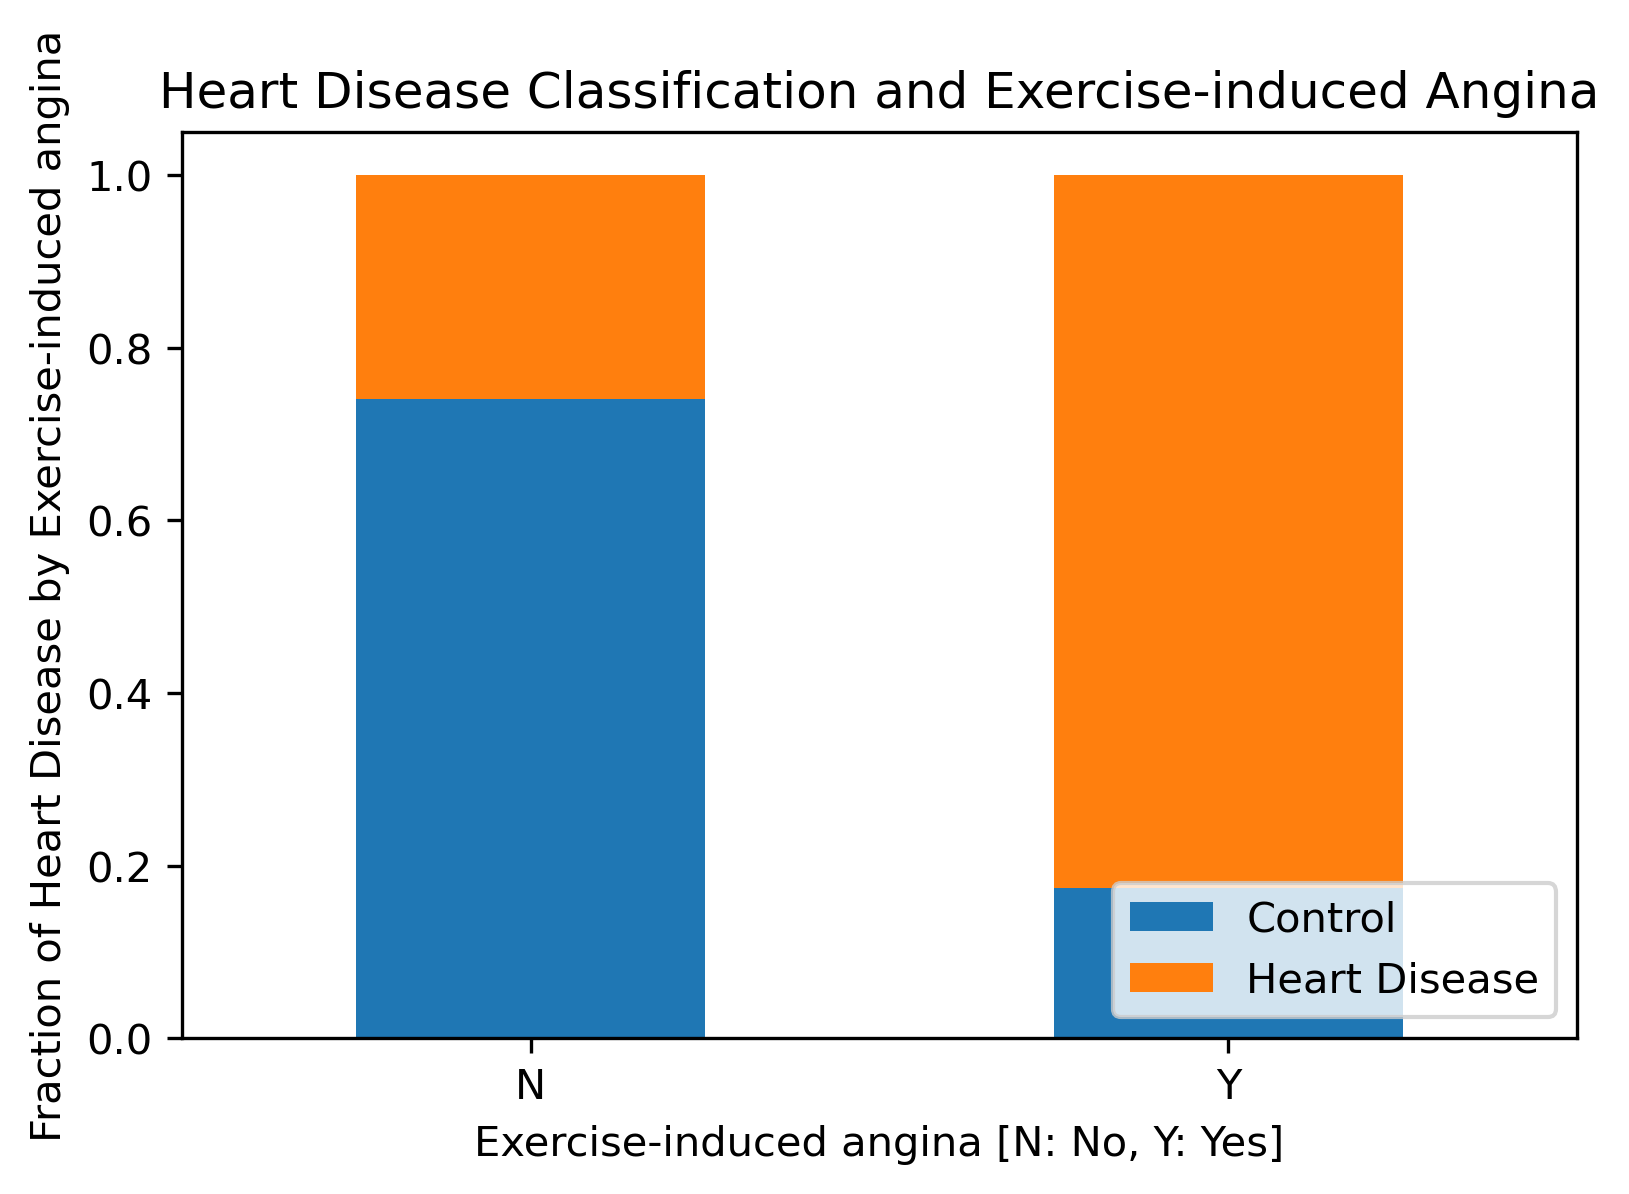

In [185]:
count_matrix5 = df.groupby(['ExerciseAngina', 'HeartDisease']).size().unstack()
print(count_matrix5)
count_matrix_norm5 = count_matrix5.div(count_matrix5.sum(axis=1), axis=0)
print(count_matrix_norm5)
count_matrix_norm5.plot(kind='bar', stacked = True)
plt.xlabel('Exercise-induced angina [N: No, Y: Yes]')
plt.xticks(rotation=0)
plt.ylabel('Fraction of Heart Disease by Exercise-induced angina')
plt.title('Heart Disease Classification and Exercise-induced Angina')
plt.legend(['Control', 'Heart Disease'], loc = 'lower right')


Text(0.5, 1.0, 'Heart Disease Classification and ST')

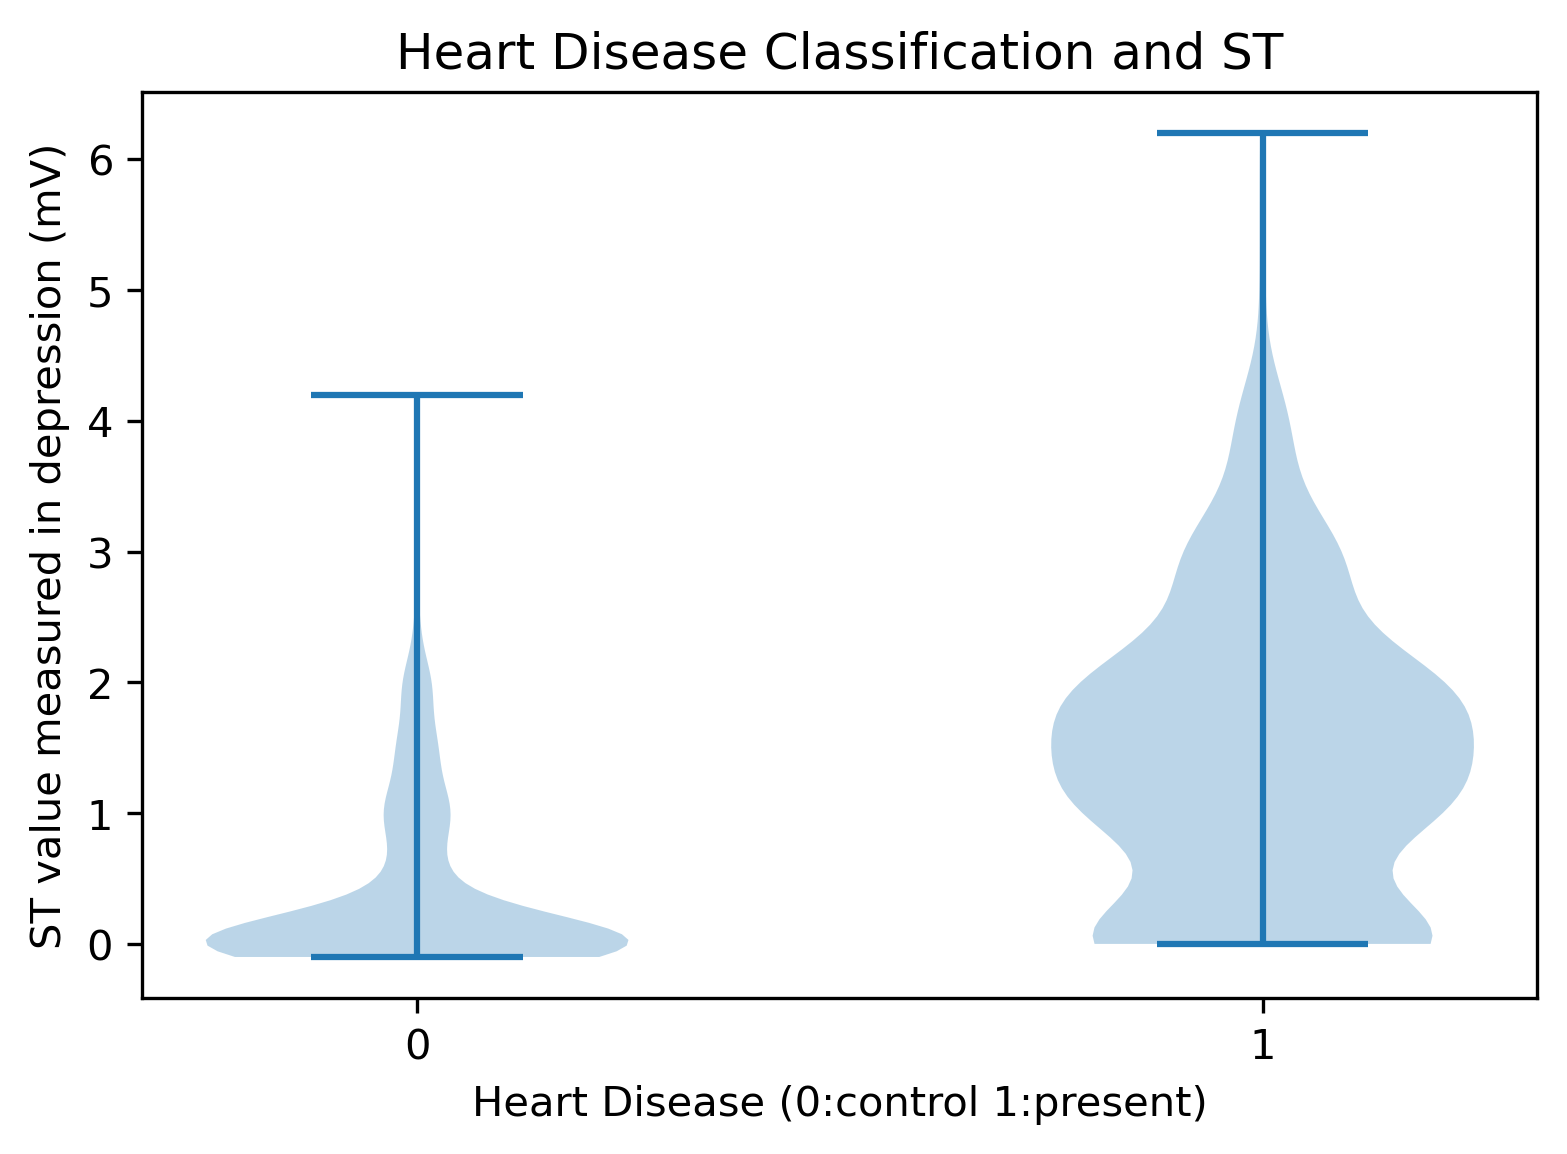

In [186]:
    dataset = [df[df['HeartDisease'] == 0]['Oldpeak'].values, 
          df[df['HeartDisease'] == 1]['Oldpeak'].values]
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['0','1'])
plt.xlabel('Heart Disease (0:control 1:present)')
plt.ylabel('ST value measured in depression (mV)')
plt.title('Heart Disease Classification and ST')


HeartDisease    0    1
ST_Slope              
Down           11   32
Flat           75  279
Up            304   45
HeartDisease         0         1
ST_Slope                        
Down          0.255814  0.744186
Flat          0.211864  0.788136
Up            0.871060  0.128940


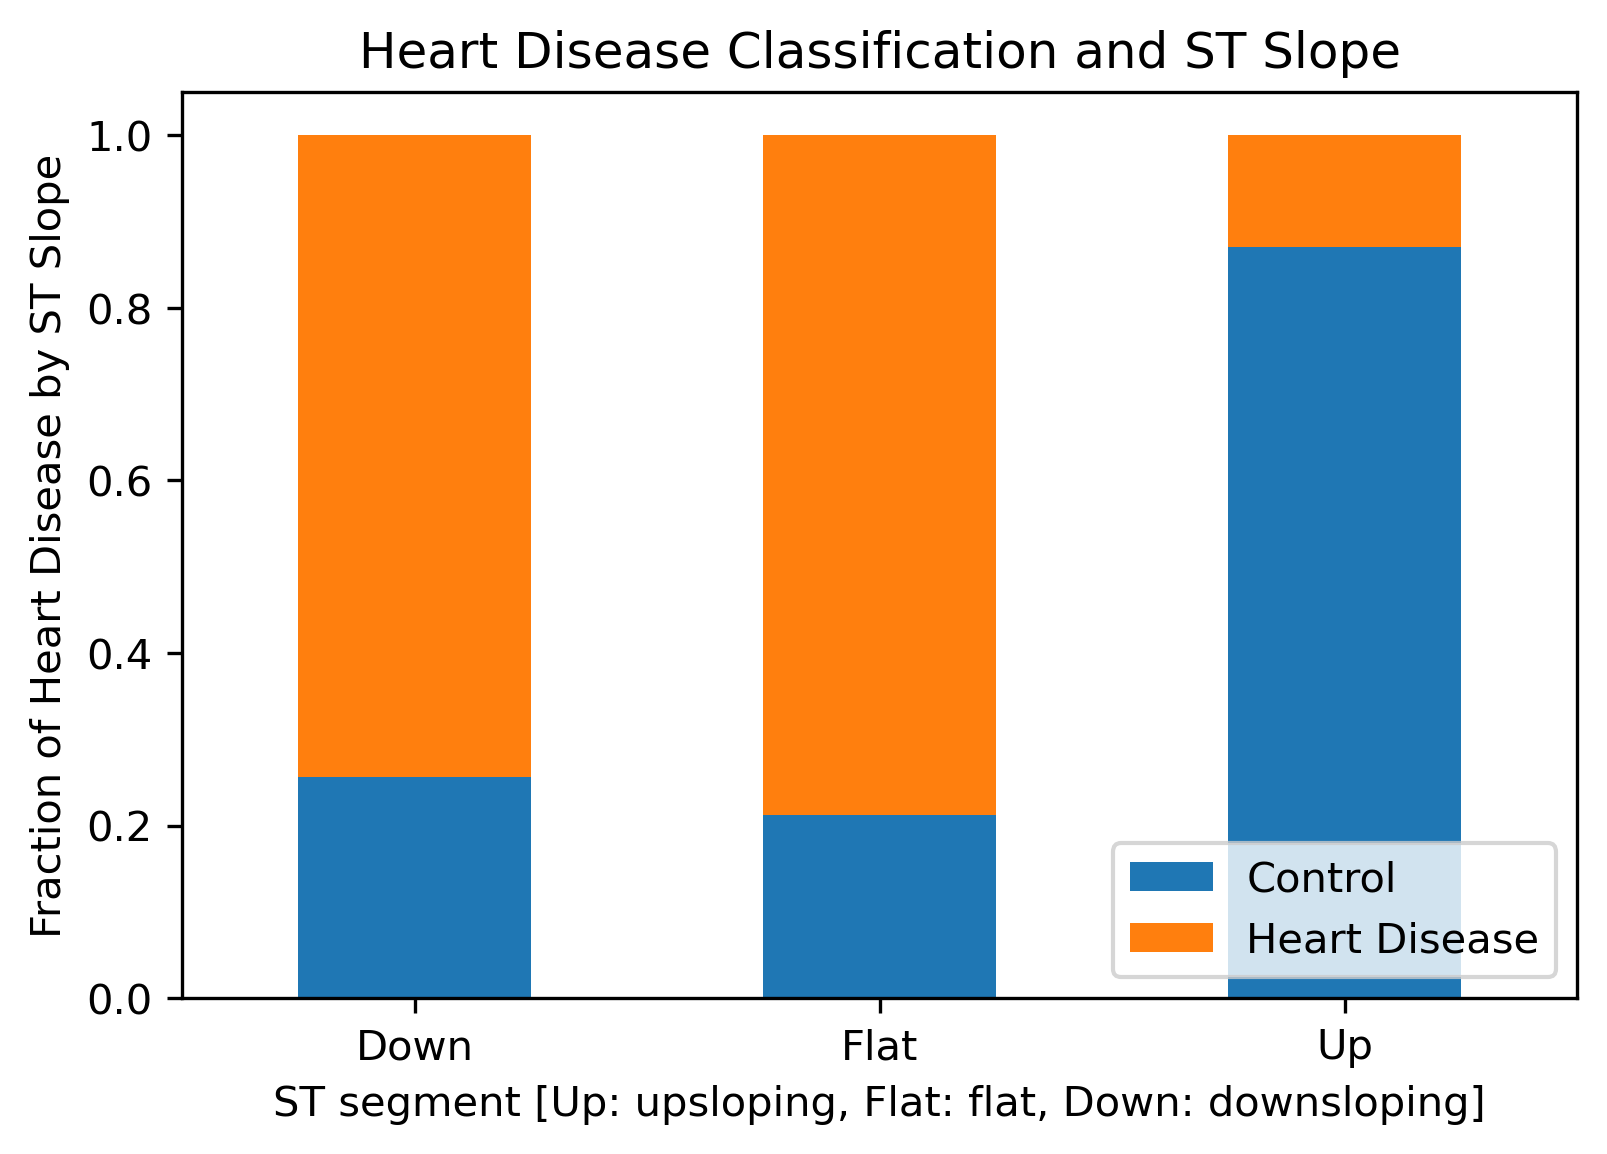

In [187]:
count_matrix6 = df.groupby(['ST_Slope', 'HeartDisease']).size().unstack()
print(count_matrix6)
count_matrix_norm6 = count_matrix6.div(count_matrix6.sum(axis=1), axis=0)
print(count_matrix_norm6)
count_matrix_norm6.plot(kind='bar', stacked = True)
plt.xlabel('ST segment [Up: upsloping, Flat: flat, Down: downsloping]')
plt.xticks(rotation=0)
plt.ylabel('Fraction of Heart Disease by ST Slope')
plt.title('Heart Disease Classification and ST Slope')
plt.legend(['Control', 'Heart Disease'], loc = 'lower right')


Text(0.5, 1.0, 'Age vs. Resting Blood Pressure')

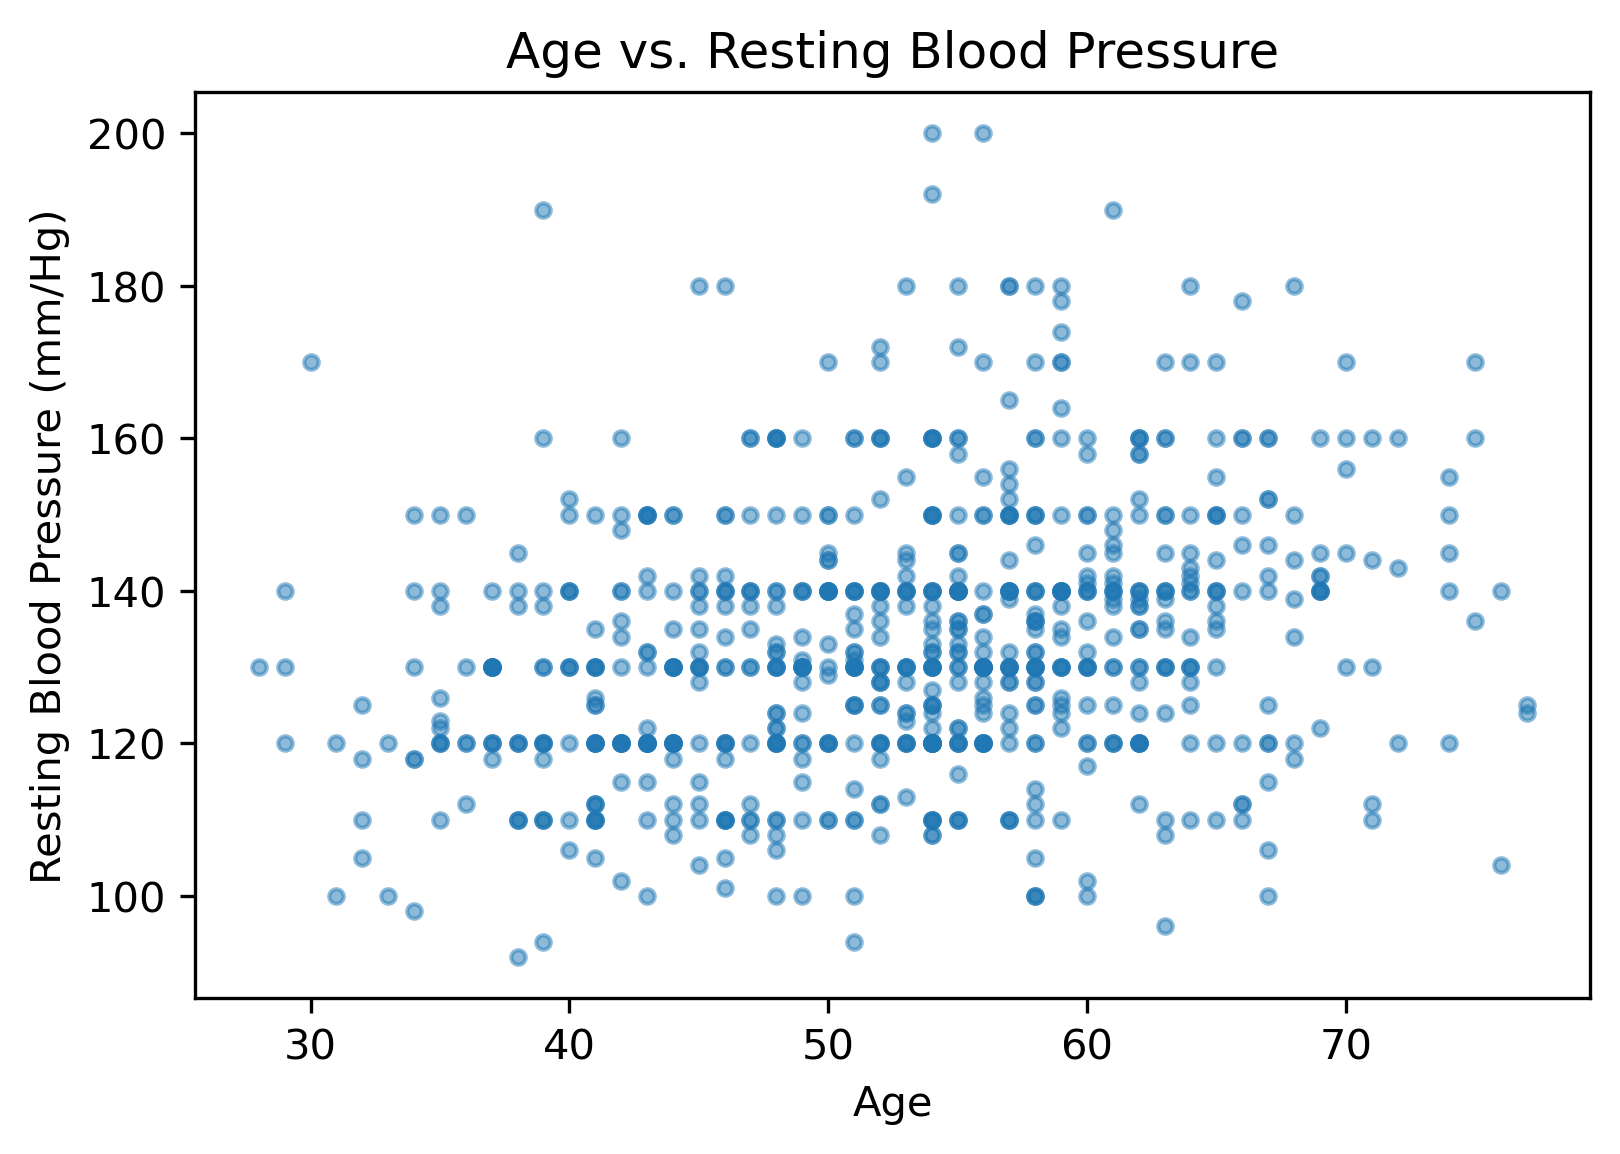

In [188]:
df.plot.scatter('Age','RestingBP',alpha=0.5,s=12) 
plt.ylabel('Resting Blood Pressure (mm/Hg)')
plt.title('Age vs. Resting Blood Pressure')


In [189]:
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# designate a random seed for reproducibility
random_seed = 34   

# initial split to generate the train group
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size=0.6, random_state = random_seed)
print('training set:',X_train.shape, y_train.shape)
# second split to generate the test and validation groups 
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size=0.5, random_state = random_seed)
X_val, y_val, X_test, y_test
print('validation set:',X_val.shape, y_val.shape)
print('test set:',X_test.shape, y_test.shape)


minmax_ftrs = ['Age']
std_ftrs = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
onehot_ftrs = ['Sex', 'FastingBS', 'ST_Slope', 'ExerciseAngina', 'RestingECG']
ordinal_ftrs = ['ChestPainType']
ordinal_cats = [['ASY', 'NAP', 'ATA', 'TA']]


# transformation 
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(),std_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)])


X_train_prep = preprocessor.fit_transform(X_train)
print('training shape:', X_train.shape)
print('prepro training shape:',X_train_prep.shape)
print('prepro training set:', X_train_prep)
X_val_prep = preprocessor.transform(X_val)
print('val shape:',X_val.shape)
print('prepro val shape:',X_val_prep.shape)
print('prepro val set:',X_val_prep.shape)
X_test_prep = preprocessor.transform(X_test)
print('test shape:', X_test.shape)
print('prepro test shape:',X_test_prep.shape)
print('prepro test:',X_test_prep.shape)


training set: (447, 11) (447,)
validation set: (149, 11) (149,)
test set: (150, 11) (150,)
training shape: (447, 11)
prepro training shape: (447, 18)
prepro training set: [[ 0.          1.          0.         ...  0.07195918  0.14018333
  -0.87184812]
 [ 1.          1.          0.         ... -0.74859579  1.57245643
  -0.87184812]
 [ 3.          0.          1.         ...  0.21965908  0.41868088
   0.32331806]
 ...
 [ 0.          0.          1.         ... -0.78141799  1.4928857
  -0.87184812]
 [ 0.          0.          1.         ... -0.07574071  0.02082724
  -0.87184812]
 [ 1.          0.          1.         ... -0.12497401 -1.8092995
  -0.87184812]]
val shape: (149, 11)
prepro val shape: (149, 18)
prepro val set: (149, 18)
test shape: (150, 11)
prepro test shape: (150, 18)
prepro test: (150, 18)


array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='RestingBP', ylabel='Age'>,
        <AxesSubplot:xlabel='Cholesterol', ylabel='Age'>,
        <AxesSubplot:xlabel='MaxHR', ylabel='Age'>,
        <AxesSubplot:xlabel='Oldpeak', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='RestingBP', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='Cholesterol', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='MaxHR', ylabel='RestingBP'>,
        <AxesSubplot:xlabel='Oldpeak', ylabel='RestingBP'>],
       [<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>,
        <AxesSubplot:xlabel='RestingBP', ylabel='Cholesterol'>,
        <AxesSubplot:xlabel='Cholesterol', ylabel='Cholesterol'>,
        <AxesSubplot:xlabel='MaxHR', ylabel='Cholesterol'>,
        <AxesSubplot:xlabel='Oldpeak', ylabel='Cholesterol'>],
       [<AxesSubplot:xlabel='Age', ylabel='MaxHR'>,
        <AxesSubplot:xlabel='RestingBP', ylabel='MaxHR'>,
       

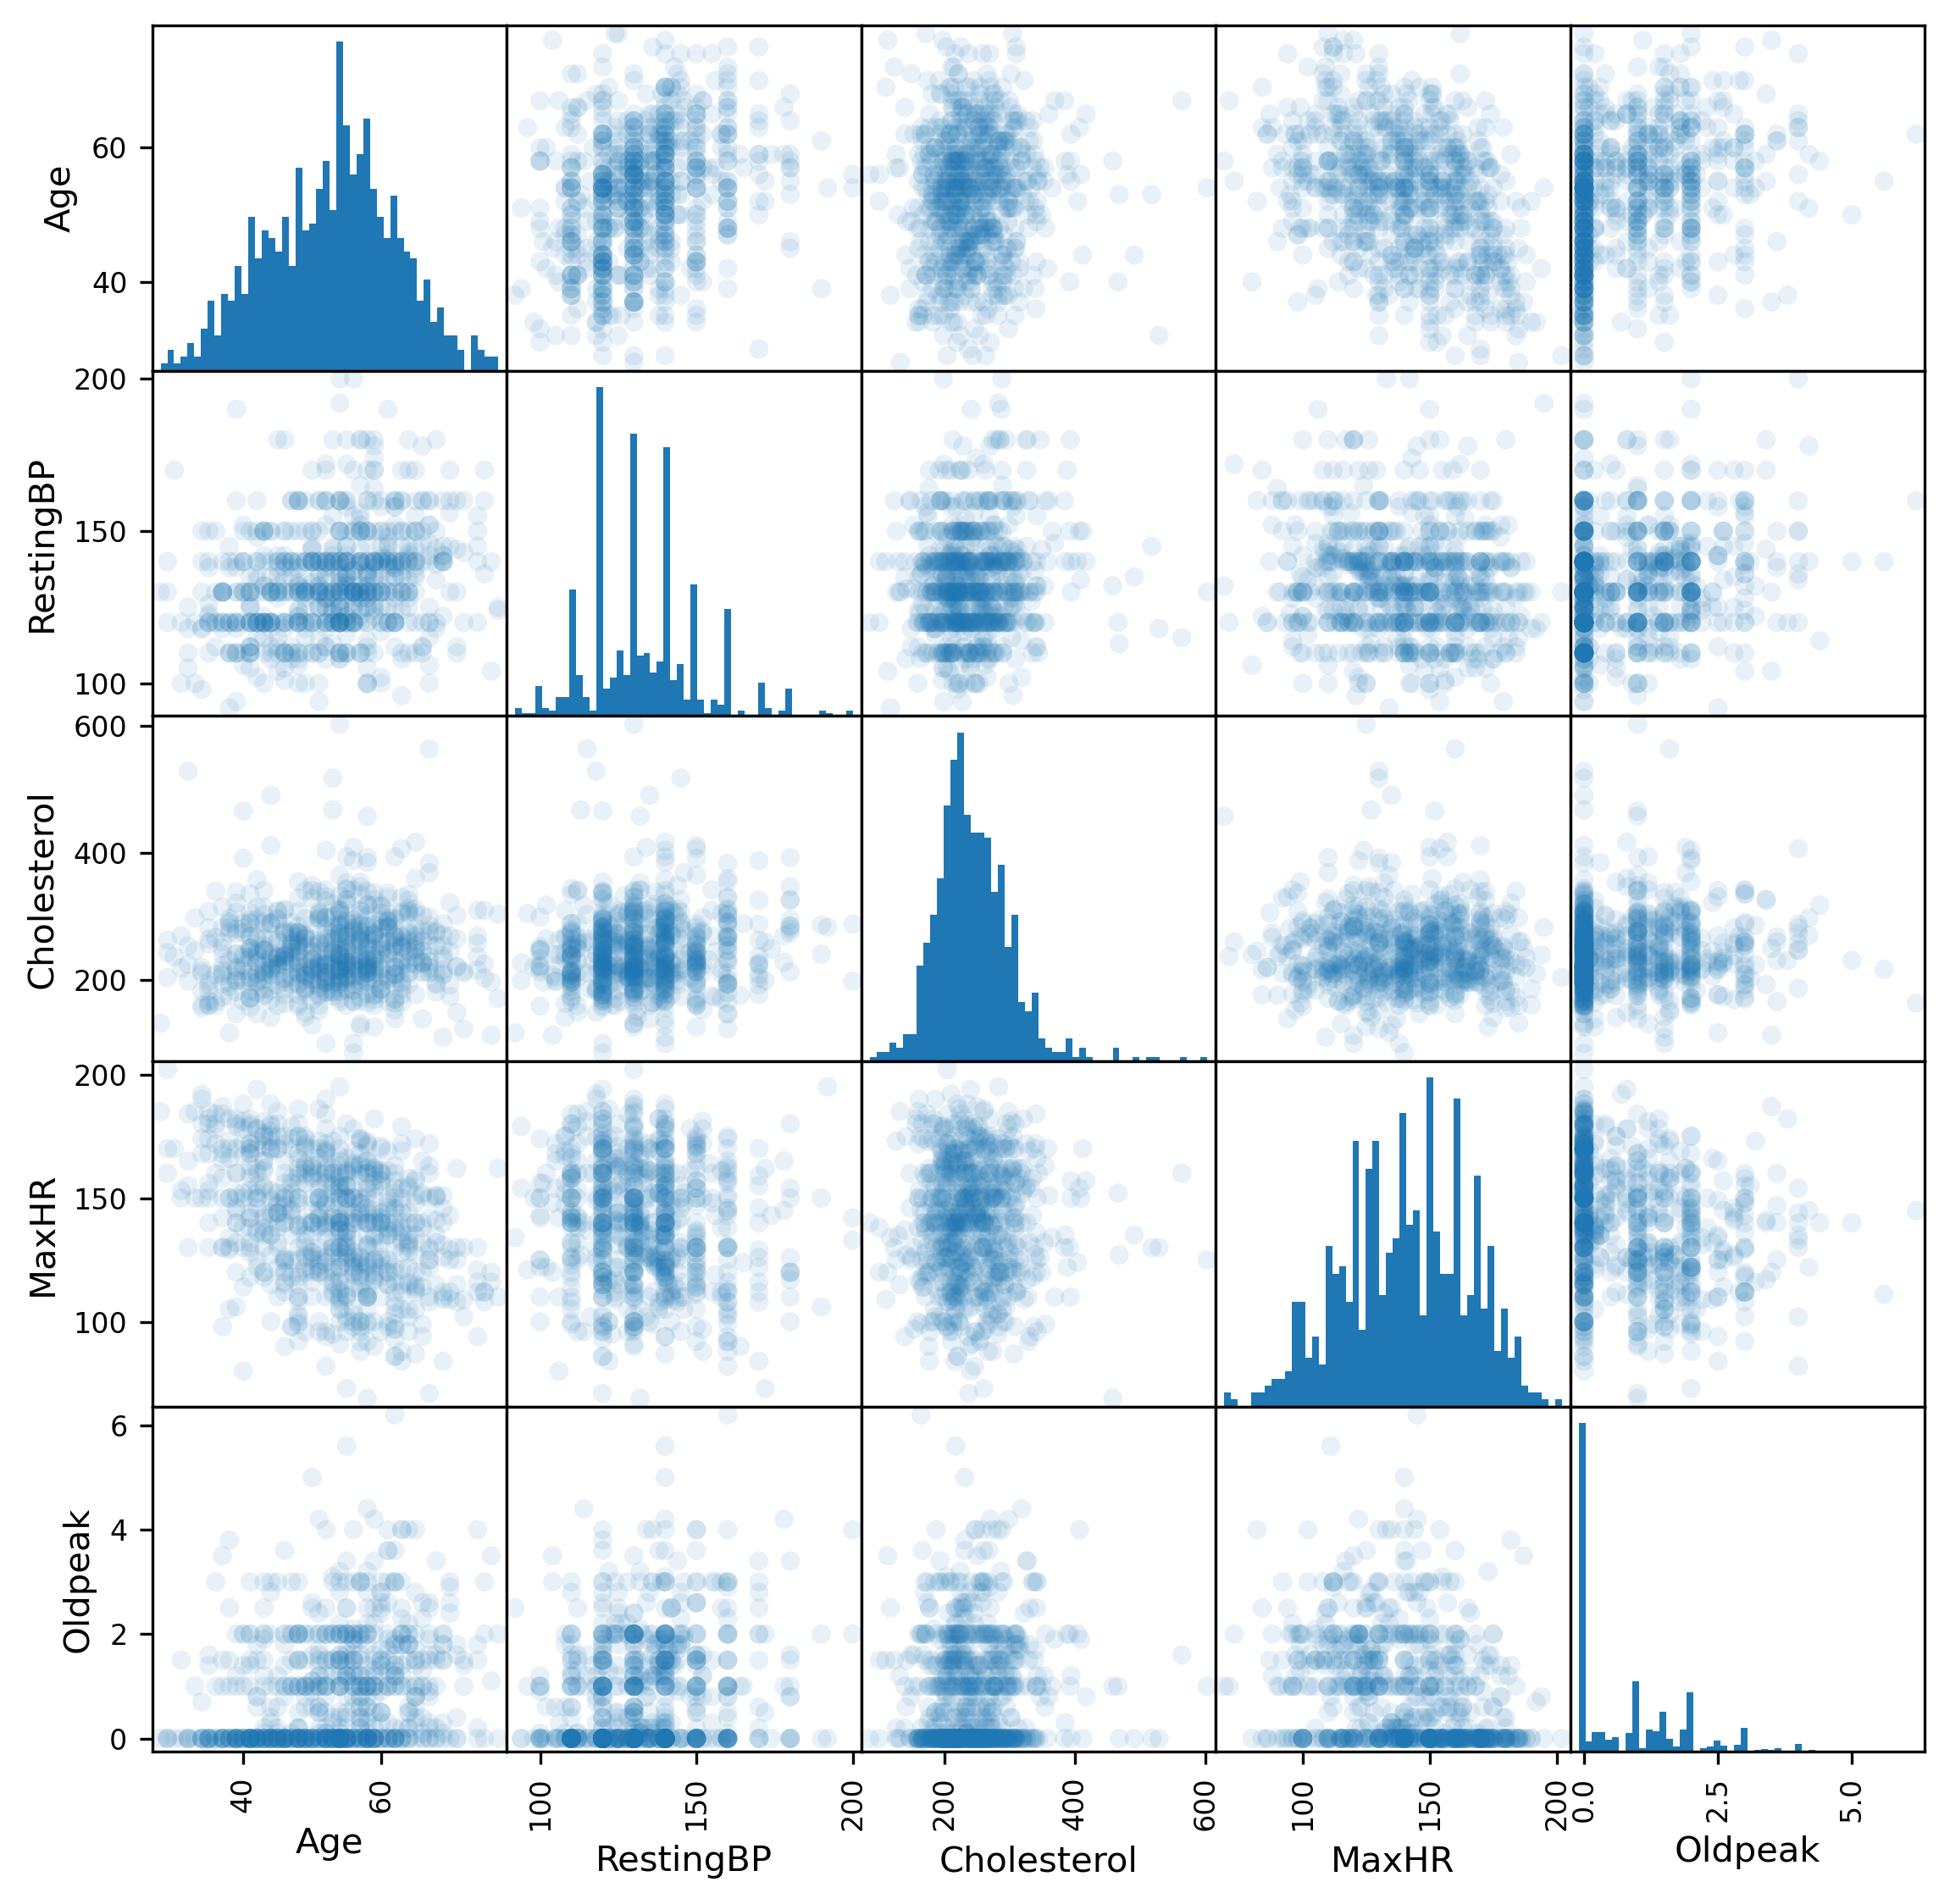

In [190]:
z = df.drop(['ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina','ST_Slope', 'HeartDisease'], axis=1)
pd.plotting.scatter_matrix(z, figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)

